# Week 10 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 10

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(569, 39)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Dalvin Cook,MIN,RB,25,8,8,0,0,0,0,0,174,954,9.80,12,25,20,189,13.50,1,2,1,13,3,0,206.30,1,1,196.30,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20
1,Alvin Kamara,NOR,RB,25,9,6,0,0,0,0,0,104,486,10.70,7,80,67,648,15.70,4,1,0,11,0,0,212.90,2,2,179.40,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80
2,Kyler Murray,ARI,QB,23,9,9,212,311,2375,17,8,87,604,15.40,10,0,0,0,0.00,0,4,2,10,0,0,271.40,1,3,271.30,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90
3,Derrick Henry,TEN,RB,26,9,9,0,0,0,0,0,201,946,11.10,8,20,11,87,16.10,0,0,0,8,0,0,156.80,3,4,151.30,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90
4,Josh Allen,BUF,QB,24,10,10,249,364,2871,21,7,72,279,11.80,5,1,1,12,12.00,1,4,4,6,0,0,249.40,2,5,249.00,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40


In [13]:
print(defense.shape)
defense.head()

(32, 34)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Baltimore Ravens,9,165,570,5.10,2907,219,987,4.51,7,326,5.89,169,11.36,1920,12,21,16,70.40,14,4,10,25,95.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00
1,Los Angeles Rams,9,168,558,4.70,2668,214,871,4.07,7,313,5.74,193,9.31,1797,9,26,15,61.10,13,8,5,31,71.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00
2,Pittsburgh Steelers,9,171,565,5.10,2863,221,961,4.35,5,308,6.18,145,13.12,1902,15,24,14,63.10,17,11,6,36,93.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00
3,Indianapolis Colts,9,177,541,4.80,2614,234,826,3.53,7,286,6.25,142,12.59,1788,11,25,16,64.90,13,11,2,21,98.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00
4,Miami Dolphins,9,182,594,5.80,3347,244,1153,4.73,11,328,6.69,168,13.06,2194,13,28,20,69.60,15,8,7,22,81.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00


In [14]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [15]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,9,165,570,5.10,2907,219,987,4.51,7,326,5.89,169,11.36,1920,12,21,16,70.40,14,4,10,25,95.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,18.33,323.00,24.33,109.67,36.22,18.78,0.52,213.33,1.33,1.56,2.78,10.56
1,Los Angeles Rams,9,168,558,4.70,2668,214,871,4.07,7,313,5.74,193,9.31,1797,9,26,15,61.10,13,8,5,31,71.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,18.67,296.44,23.78,96.78,34.78,21.44,0.62,199.67,1.00,1.44,3.44,7.89
2,Pittsburgh Steelers,9,171,565,5.10,2863,221,961,4.35,5,308,6.18,145,13.12,1902,15,24,14,63.10,17,11,6,36,93.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,19.00,318.11,24.56,106.78,34.22,16.11,0.47,211.33,1.67,1.89,4.00,10.33
3,Indianapolis Colts,9,177,541,4.80,2614,234,826,3.53,7,286,6.25,142,12.59,1788,11,25,16,64.90,13,11,2,21,98.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,19.67,290.44,26.00,91.78,31.78,15.78,0.50,198.67,1.22,1.44,2.33,10.89
4,Miami Dolphins,9,182,594,5.80,3347,244,1153,4.73,11,328,6.69,168,13.06,2194,13,28,20,69.60,15,8,7,22,81.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,20.22,371.89,27.11,128.11,36.44,18.67,0.51,243.78,1.44,1.67,2.44,9.00


In [16]:
offense[offense['Player'] == "J.K. Dobbins"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
146,J.K. Dobbins,BAL,RB,22,9,0,0,0,0,0,0,57,310,9.40,2,20,15,88,13.70,0,0,0,2,0,0,59.30,45,,51.80,14.20,6.10,4.40,1.70,5.50,2.90,0.00,12.10,3.50,1.40


In [17]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 
             'A.J. Brown', 'Antonio Brown', 'John Brown', 'Josh Brown', 'DJ Chark', 
             'Nick Chubb', 'Chase Claypool', 'James Conner', 'Dalvin Cook', 'Jared Cook',
             'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 'Chase Edmonds', 'Clyde Edwards-Helaire', 
             'Austen Ekeler', 'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 
             'Noah Fant', 'Leonard Fournette', 'Travis Fulgham', 'Will Fuller', 'Mike Gesicki', 
             'Antonio Gibson', 'Chris Godwin', 'Kenny Golladay', 'Melvin Gordon', 
             'Todd Gurley', 'Damien Harris', 'Hunter Henry', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Austin Hooper', 'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 'Josh Jacobs', 'Justin Jefferson', 
             'David Johnson', 'Diontae Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 
             'Travis Kelce', 'George Kittle', 'Cooper Kupp', 'Phillip Lindsay', 'Tyler Lockett', 
             'Christian McCaffrey', 'Jerick McKinnon', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon',
             'David Montgomery', 'D.J. Moore', 'Zack Moss', 'DeVante Parker', 'Calvin Ridley', 
             'James Robinson', 'Allen Robinson', 'Curtis Samuel', 'Miles Sanders', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Adam Thielen', 'Michael Thomas', 'Robert Tonyan', 
             'Darren Waller', 'Robert Woods']


In [18]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Ben Roethlisberger', 'Matt Ryan', 
             'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [19]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn", 'Kai Forbath', 
           'Wil Lutz', 'Jason Meyers', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [20]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Brandin Cooks', 'Kenyan Drake', 
              'Rob Gronkowski', 'Darrell Henderson', 'Derrick Henry', 'DeAndre Hopkins', 
              'Julio Jones', 'Allen Lazard', 'Jonnu Smith']


## QB Analysis

In [21]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
2,Kyler Murray,ARI,QB,23,9,9,212,311,2375,17,8,87,604,15.40,10,0,0,0,0.00,0,4,2,10,0,0,271.40,1,3,271.30,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90
4,Josh Allen,BUF,QB,24,10,10,249,364,2871,21,7,72,279,11.80,5,1,1,12,12.00,1,4,4,6,0,0,249.40,2,5,249.00,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40
5,Patrick Mahomes,KAN,QB,25,9,9,220,329,2687,25,1,35,171,12.90,2,0,0,0,0.00,0,1,0,2,0,2,239.60,3,6,239.50,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00
6,Russell Wilson,SEA,QB,32,9,9,233,334,2789,28,10,45,325,9.20,1,0,0,0,0.00,0,4,3,1,0,1,248.10,4,7,248.00,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90
16,Aaron Rodgers,GNB,QB,37,9,9,213,314,2578,26,3,14,65,10.40,1,1,1,-6,-6.00,0,1,1,1,0,0,214.50,5,17,214.00,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40


In [22]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [23]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
2,Kyler Murray,ARI,QB,23,9,9,212,311,2375,17,8,87,604,15.40,10,0,0,0,0.00,0,4,2,10,0,0,271.40,1,3,271.30,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,23.56,34.56,0.68,263.89,1.89,7.64,0.89,0.22,67.11,30.14
4,Josh Allen,BUF,QB,24,10,10,249,364,2871,21,7,72,279,11.80,5,1,1,12,12.00,1,4,4,6,0,0,249.40,2,5,249.00,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,24.90,36.40,0.68,287.10,2.10,7.89,0.70,0.40,27.90,24.90
5,Patrick Mahomes,KAN,QB,25,9,9,220,329,2687,25,1,35,171,12.90,2,0,0,0,0.00,0,1,0,2,0,2,239.60,3,6,239.50,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,24.44,36.56,0.67,298.56,2.78,8.17,0.11,0.00,19.00,26.61
6,Russell Wilson,SEA,QB,32,9,9,233,334,2789,28,10,45,325,9.20,1,0,0,0,0.00,0,4,3,1,0,1,248.10,4,7,248.00,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,25.89,37.11,0.70,309.89,3.11,8.35,1.11,0.33,36.11,27.56
16,Aaron Rodgers,GNB,QB,37,9,9,213,314,2578,26,3,14,65,10.40,1,1,1,-6,-6.00,0,1,1,1,0,0,214.50,5,17,214.00,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,23.67,34.89,0.68,286.44,2.89,8.21,0.33,0.11,7.22,23.78


In [24]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,62.00,65.00,65.00,62.00,65.00,65.00,65.00,65.00
mean,28.60,5.75,4.58,104.34,158.88,1160.22,7.75,3.51,18.54,82.15,6.73,1.11,0.25,0.22,1.69,0.79,0.05,2.15,0.95,1.15,0.03,0.37,88.26,88.15,9.59,10.05,9.78,9.34,8.11,8.06,8.92,7.57,9.44,7.31,14.95,23.22,0.63,164.72,1.02,6.73,0.55,0.15,10.87,11.99
std,5.17,3.15,3.96,92.11,137.04,1037.45,8.25,3.31,21.00,126.51,4.58,1.94,1.03,0.80,9.57,3.45,0.21,2.24,1.29,1.99,0.17,0.84,83.83,83.81,10.61,12.01,11.12,10.98,10.33,10.58,12.07,9.52,11.62,9.66,9.54,14.19,0.14,108.69,0.88,2.34,0.45,0.21,14.18,8.80
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.50,0.00
25%,24.00,3.00,0.00,8.00,13.00,94.00,0.00,0.00,5.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.50,11.50,0.59,62.00,0.00,5.99,0.00,0.00,0.38,3.30
50%,27.00,6.00,4.00,89.00,140.00,939.00,4.00,3.00,12.00,26.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,55.60,55.60,4.20,1.50,9.10,1.80,0.90,0.10,0.20,0.30,0.20,0.50,17.88,27.22,0.65,191.88,1.00,6.88,0.67,0.00,6.50,13.10
75%,32.00,9.00,9.00,201.00,301.00,2156.00,14.00,6.00,25.00,118.00,10.10,1.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,1.00,0.00,0.00,164.80,164.70,19.40,18.20,18.10,20.20,15.20,16.10,17.30,16.80,21.40,12.50,23.67,34.89,0.68,255.20,1.67,7.71,0.89,0.25,18.60,19.13
max,43.00,10.00,10.00,254.00,385.00,2871.00,28.00,12.00,90.00,604.00,15.40,10.00,8.00,6.00,74.00,16.00,1.00,9.00,5.00,10.00,1.00,5.00,271.40,271.30,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,37.90,31.80,30.20,44.40,1.00,371.20,3.11,17.20,1.50,1.00,67.11,30.14


In [25]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
16,Aaron Rodgers,GNB,QB,37,9,9,213,314,2578,26,3,14,65,10.40,1,1,1,-6,-6.00,0,1,1,1,0,0,214.50,5,17,214.00,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,23.67,34.89,0.68,286.44,2.89,8.21,0.33,0.11,7.22,23.78
40,Justin Herbert,LAC,QB,22,8,8,201,301,2333,19,6,37,176,11.60,3,0,0,0,0.00,0,4,1,3,0,0,196.90,8,41,196.90,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,25.12,37.62,0.67,291.62,2.38,7.75,0.75,0.12,22.00,24.61


In [26]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
16,Aaron Rodgers,GNB,QB,37,9,9,213,314,2578,26,3,14,65,10.40,1,1,1,-6,-6.00,0,1,1,1,0,0,214.50,5,17,214.00,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,23.67,34.89,0.68,286.44,2.89,8.21,0.33,0.11,7.22,23.78
40,Justin Herbert,LAC,QB,22,8,8,201,301,2333,19,6,37,176,11.60,3,0,0,0,0.00,0,4,1,3,0,0,196.90,8,41,196.90,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,25.12,37.62,0.67,291.62,2.38,7.75,0.75,0.12,22.00,24.61
66,Teddy Bridgewater,CAR,QB,28,10,10,238,330,2552,13,7,35,196,11.00,3,0,0,0,0.00,0,1,1,3,0,1,184.70,10,67,184.60,19.40,10.70,14.60,27.20,20.80,11.40,19.20,13.00,28.30,20.00,23.80,33.00,0.72,255.20,1.30,7.73,0.70,0.10,19.60,18.46
81,Joe Burrow,CIN,QB,24,9,9,242,370,2485,12,5,35,130,10.10,3,0,0,0,0.00,0,8,3,3,0,0,167.40,14,,167.30,17.30,24.50,20.40,16.10,5.30,17.70,34.60,18.90,0.00,12.50,26.89,41.11,0.65,276.11,1.33,6.72,0.56,0.33,14.44,18.59
82,Carson Wentz,PHI,QB,28,9,9,199,342,2091,12,12,41,206,5.20,5,0,0,0,0.00,0,9,4,5,0,5,172.20,16,,172.20,15.00,14.40,23.50,22.40,19.40,29.40,28.80,10.60,0.00,8.70,22.11,38.00,0.58,232.33,1.33,6.11,1.33,0.44,22.89,19.13


In [27]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
16,Aaron Rodgers,GNB,QB,37,9,9,1.22,1.08,0.40,1.49,2.87,8.21,-0.42,-0.07,-0.04,23.78
40,Justin Herbert,LAC,QB,22,8,8,1.38,1.27,0.33,1.54,2.18,7.75,0.44,-0.00,1.53,24.61
66,Teddy Bridgewater,CAR,QB,28,10,10,1.24,0.94,0.67,1.18,0.74,7.73,0.34,-0.12,1.27,18.46
81,Joe Burrow,CIN,QB,24,9,9,1.58,1.52,0.25,1.39,0.78,6.72,0.04,0.99,0.73,18.59
82,Carson Wentz,PHI,QB,28,9,9,1.05,1.30,-0.21,0.95,0.78,6.11,1.65,1.52,1.62,19.13


In [28]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [29]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [30]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
40,Justin Herbert,LAC,QB,22,8,8,1.38,1.27,0.33,1.54,2.18,7.75,0.44,-0.00,1.53,24.61,40.16
16,Aaron Rodgers,GNB,QB,37,9,9,1.22,1.08,0.40,1.49,2.87,8.21,-0.42,-0.07,-0.04,23.78,39.49
92,Ryan Fitzpatrick,MIA,QB,38,6,6,1.15,0.93,0.54,1.19,1.23,7.79,1.30,-0.60,1.58,20.97,34.67
66,Teddy Bridgewater,CAR,QB,28,10,10,1.24,0.94,0.67,1.18,0.74,7.73,0.34,-0.12,1.27,18.46,32.01
85,Cam Newton,NWE,QB,31,8,8,0.59,0.44,0.46,0.56,-0.51,7.38,0.70,-0.00,3.64,19.45,31.31


In [33]:
qb1 = 16
qb2 = 40

Avg PassingYds_pG: 164.72
Aaron Rodgers PassingYds_pG: 286.44
--------------------------------------------------
Avg PassingYds_pG: 164.72
Justin Herbert PassingYds_pG: 291.62
--------------------------------------------------


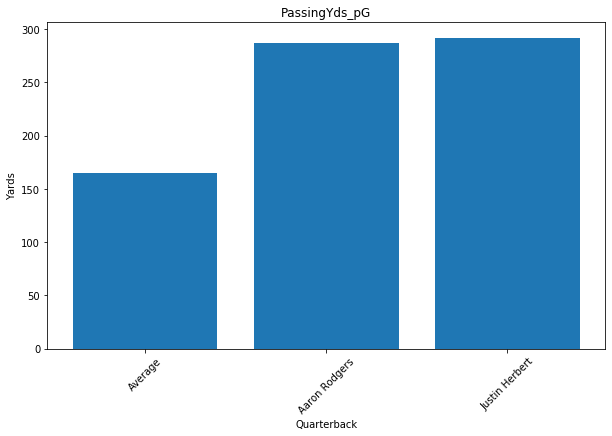

In [34]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 23.22
Aaron Rodgers PassesAttempted_pG: 34.89
--------------------------------------------------
Avg PassesAttempted_pG: 23.22
Justin Herbert PassesAttempted_pG: 37.62
--------------------------------------------------


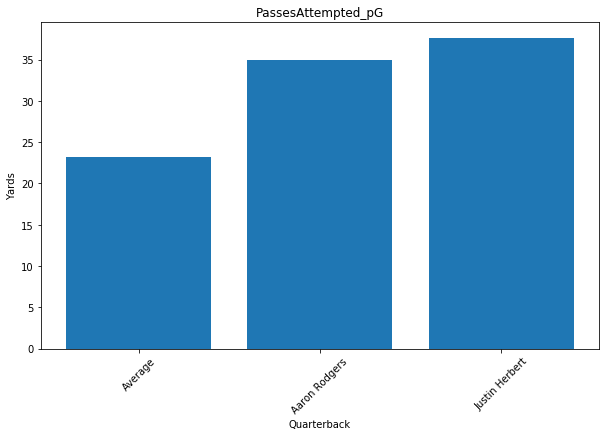

In [35]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.63
Aaron Rodgers Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent: 0.63
Justin Herbert Completion_Percent: 0.67
--------------------------------------------------


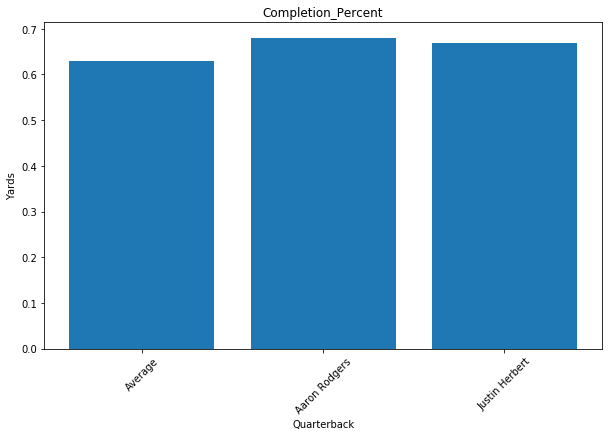

In [36]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 10.87
Aaron Rodgers RushingYds_pG: 7.22
--------------------------------------------------
Avg RushingYds_pG: 10.87
Justin Herbert RushingYds_pG: 22.0
--------------------------------------------------


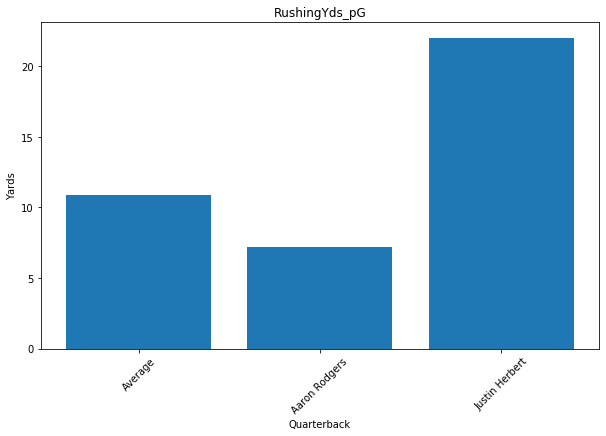

In [37]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

Avg PassingTDs_pG: 1.02
Aaron Rodgers PassingTDs_pG: 2.89
--------------------------------------------------
Avg PassingTDs_pG: 1.02
Justin Herbert PassingTDs_pG: 2.38
--------------------------------------------------


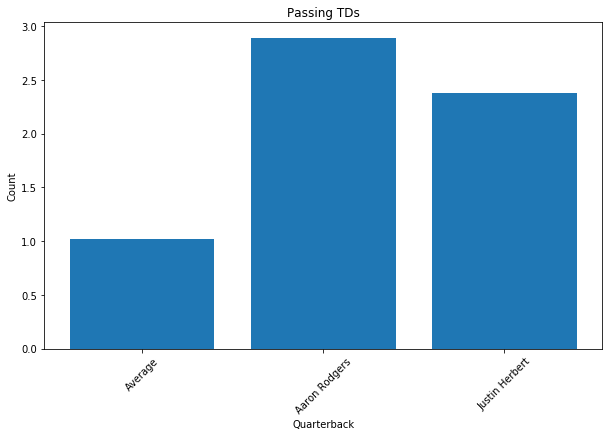

In [39]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

Week 7 match ups:
    
    Green Bay vs Indianapolis Colts
    Los Angeles Chargers vs New York Jets
 

In [40]:
qb_opp = ['Indianapolis Colts', 'New York Jets']

In [41]:
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
3,Indianapolis Colts,9,177,541,4.80,2614,234,826,3.53,7,286,6.25,142,12.59,1788,11,25,16,64.90,13,11,2,21,98.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,19.67,290.44,26.00,91.78,31.78,15.78,0.50,198.67,1.22,1.44,2.33,10.89
28,New York Jets,9,268,598,6.10,3624,267,1088,4.07,12,320,7.92,186,13.63,2536,16,35,19,63.70,10,7,3,11,27.00,7.00,4.00,0.00,8.00,2.00,6.00,5.00,-4.00,-1.00,0.00,29.78,402.67,29.67,120.89,35.56,20.67,0.58,281.78,1.78,1.11,1.22,3.00


In [42]:
def1 = 3
def2 = 28

Avg RZ_Percent: 62.83
Indianapolis Colts RZ_Percent: 64.9
--------------------------------------------------
Avg RZ_Percent: 62.83
New York Jets RZ_Percent: 63.7
--------------------------------------------------


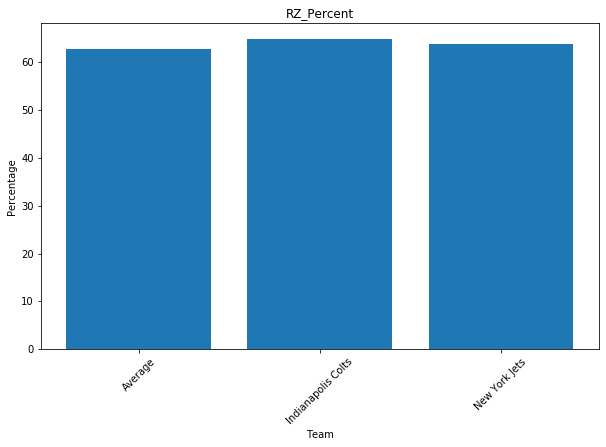

In [43]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Passing_Yds_pG: 244.06
Indianapolis Colts Passing_Yds_pG: 198.67
--------------------------------------------------
Avg Passing_Yds_pG: 244.06
New York Jets Passing_Yds_pG: 281.78
--------------------------------------------------


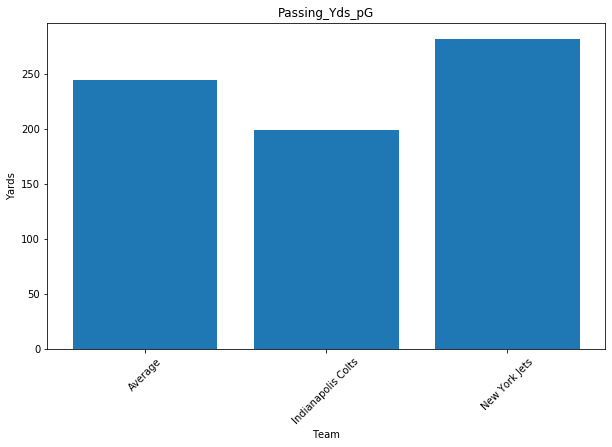

In [44]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.74
Indianapolis Colts Passing_TDs_pG: 1.22
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
New York Jets Passing_TDs_pG: 1.78
--------------------------------------------------


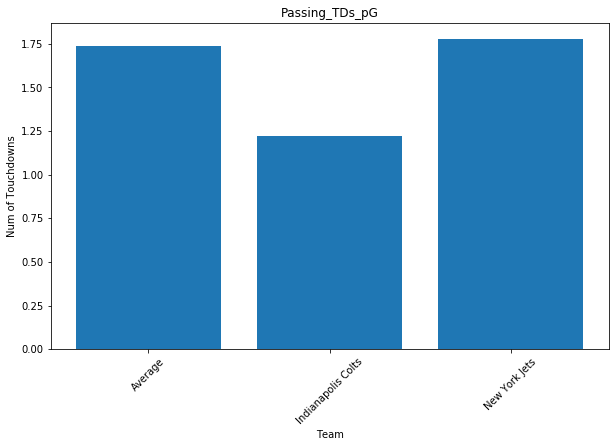

In [45]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Ttl_Pts_Allowed_pG: 25.16
Indianapolis Colts Ttl_Pts_Allowed_pG: 19.67
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.16
New York Jets Ttl_Pts_Allowed_pG: 29.78
--------------------------------------------------


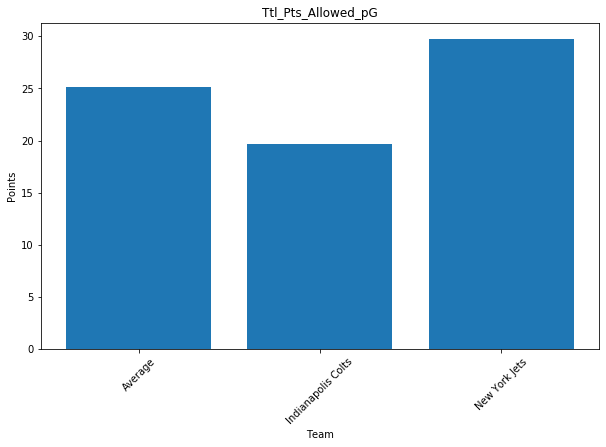

In [46]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Ttl_Turnovers_pG: 1.3
Indianapolis Colts Ttl_Turnovers_pG: 1.44
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
New York Jets Ttl_Turnovers_pG: 1.11
--------------------------------------------------


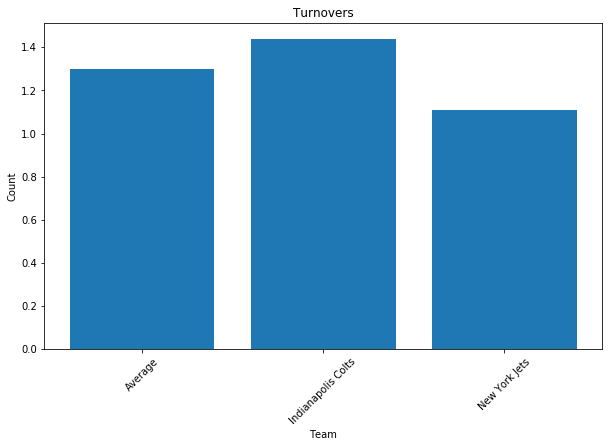

In [47]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

Flipping back to Herbert this week. The Jets have allowed 100 more passing yards per game and generated less turnovers per game than the Colts. Herbert may be more volatile in terms of interceptions, but the Jets don't seem to get to quarterbacks as much at the Colts.

## Runningbacks

In [48]:
runningbacks = offense[offense['Position'] == 'RB']

In [49]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [50]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,8,8,0,0,0,0,0,174,954,9.80,12,25,20,189,13.50,1,2,1,13,3,0,206.30,1,1,196.30,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,21.75,119.25,3.12,2.50,1.50,0.12,0.12
1,Alvin Kamara,NOR,RB,25,9,6,0,0,0,0,0,104,486,10.70,7,80,67,648,15.70,4,1,0,11,0,0,212.90,2,2,179.40,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,11.56,54.00,8.89,7.44,0.78,0.44,0.00
3,Derrick Henry,TEN,RB,26,9,9,0,0,0,0,0,201,946,11.10,8,20,11,87,16.10,0,0,0,8,0,0,156.80,3,4,151.30,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,22.33,105.11,2.22,1.22,0.89,0.00,0.00
10,James Robinson,JAX,RB,22,9,9,0,0,0,0,0,155,689,8.50,5,39,29,228,15.60,2,2,1,7,1,0,148.20,4,11,133.70,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,11.20,17.22,76.56,4.33,3.22,0.56,0.22,0.11
12,Josh Jacobs,LVR,RB,22,9,9,0,0,0,0,0,182,700,11.50,8,30,23,149,10.80,0,1,1,8,0,0,142.40,5,13,130.90,31.90,10.50,6.30,7.30,20.50,0.00,3.10,12.80,12.80,25.60,20.22,77.78,3.33,2.56,0.89,0.00,0.11


In [51]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
3,Derrick Henry,TEN,RB,26,9,9,0,0,0,0,0,201,946,11.10,8,20,11,87,16.10,0,0,0,8,0,0,156.80,3,4,151.30,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,22.33,105.11,2.22,1.22,0.89,0.00,0.00
47,Darrell Henderson,LAR,RB,23,9,7,0,0,0,0,0,102,486,11.60,4,16,11,125,14.60,1,0,0,5,0,0,96.60,15,48,91.10,0.60,18.10,18.00,3.80,18.80,9.20,7.70,5.80,0.00,9.30,11.33,54.00,1.78,1.22,0.44,0.11,0.00
60,Kenyan Drake,ARI,RB,26,8,6,0,0,0,0,0,135,612,9.30,4,11,8,38,11.50,0,1,1,4,0,0,91.00,17,61,87.00,12.50,9.50,7.90,3.50,12.20,28.40,4.10,0.00,0.00,8.90,16.88,76.50,1.38,1.00,0.50,0.00,0.12
67,Chris Carson,SEA,RB,26,6,6,0,0,0,0,0,66,323,12.90,3,25,22,147,12.80,3,1,0,6,0,0,94.00,20,68,83.00,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,0.00,11.00,53.83,4.17,3.67,0.50,0.50,0.00


In [52]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [53]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
3,Derrick Henry,TEN,RB,9,9,4.21,4.44,0.64,0.14,4.38,-0.42,-0.33
41,D'Andre Swift,DET,RB,9,1,0.81,0.96,2.24,2.21,1.87,1.79,-0.33
47,Darrell Henderson,LAR,RB,9,7,1.64,1.83,0.31,0.14,1.87,0.68,-0.33
60,Kenyan Drake,ARI,RB,8,6,2.93,2.98,0.00,-0.07,2.19,-0.42,2.70
64,Jonathan Taylor,IND,RB,9,8,1.93,1.51,0.89,1.28,1.87,-0.42,2.37


In [54]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
67,Chris Carson,SEA,RB,6,6,1.56,1.83,2.11,2.42,2.19,4.54,-0.33,14.98
3,Derrick Henry,TEN,RB,9,9,4.21,4.44,0.64,0.14,4.38,-0.42,-0.33,13.72
131,Raheem Mostert,SFO,RB,4,4,1.97,2.94,1.23,1.56,0.78,2.06,-0.33,10.88
41,D'Andre Swift,DET,RB,9,1,0.81,0.96,2.24,2.21,1.87,1.79,-0.33,10.21
72,Nyheim Hines,IND,RB,9,0,0.16,0.08,2.41,2.42,0.62,3.99,-0.33,10.02
171,Austin Ekeler,LAC,RB,4,4,1.86,2.24,2.18,2.96,0.78,-0.42,-0.33,9.93
69,Rex Burkhead,NWE,RB,9,0,0.63,0.59,1.48,1.38,1.25,2.89,-0.33,8.56
109,Myles Gaskin,MIA,RB,7,5,2.33,1.90,2.74,3.00,0.98,-0.42,3.14,7.39
121,Giovani Bernard,CIN,RB,9,3,0.24,0.06,1.99,1.90,0.62,1.79,-0.33,6.93
47,Darrell Henderson,LAR,RB,9,7,1.64,1.83,0.31,0.14,1.87,0.68,-0.33,6.81


In [55]:
rb1 = 67
rb2 = 3
rb3 = 41
rb4 = 72
rb5 = 121
rb6 = 47

Avg RushingAttempts_pG: 4.3
Chris Carson RushingAttempts_pG: 11.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.3
Derrick Henry RushingAttempts_pG: 22.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.3
D'Andre Swift RushingAttempts_pG: 7.78
--------------------------------------------------
Avg RushingAttempts_pG: 4.3
Nyheim Hines RushingAttempts_pG: 5.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.3
Giovani Bernard RushingAttempts_pG: 5.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.3
Darrell Henderson RushingAttempts_pG: 11.33
--------------------------------------------------


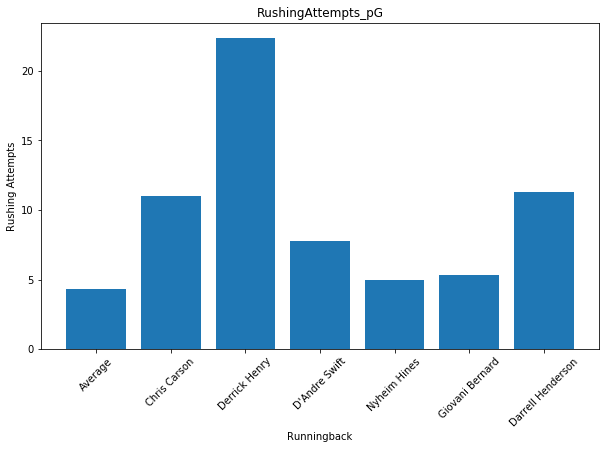

In [56]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.04
Chris Carson RushingYds_pG: 53.83
--------------------------------------------------
Avg RushingYds_pG: 18.04
Derrick Henry RushingYds_pG: 105.11
--------------------------------------------------
Avg RushingYds_pG: 18.04
D'Andre Swift RushingYds_pG: 36.78
--------------------------------------------------
Avg RushingYds_pG: 18.04
Nyheim Hines RushingYds_pG: 19.67
--------------------------------------------------
Avg RushingYds_pG: 18.04
Giovani Bernard RushingYds_pG: 19.22
--------------------------------------------------
Avg RushingYds_pG: 18.04
Darrell Henderson RushingYds_pG: 54.0
--------------------------------------------------


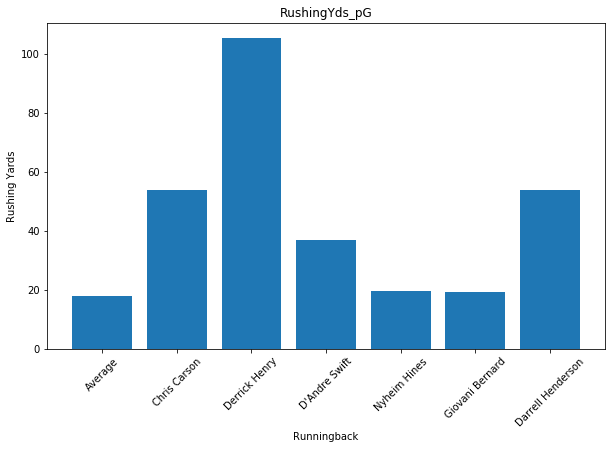

In [57]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg RushingTDs_pG: 0.11
Chris Carson RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Derrick Henry RushingTDs_pG: 0.89
--------------------------------------------------
Avg RushingTDs_pG: 0.11
D'Andre Swift RushingTDs_pG: 0.44
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Nyheim Hines RushingTDs_pG: 0.22
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Giovani Bernard RushingTDs_pG: 0.22
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Darrell Henderson RushingTDs_pG: 0.44
--------------------------------------------------


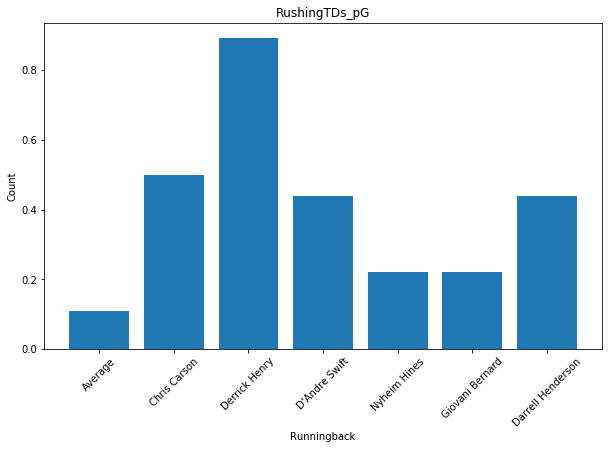

In [58]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

Avg Targeted_pG: 1.37
Chris Carson Targeted_pG: 4.17
--------------------------------------------------
Avg Targeted_pG: 1.37
Derrick Henry Targeted_pG: 2.22
--------------------------------------------------
Avg Targeted_pG: 1.37
D'Andre Swift Targeted_pG: 4.33
--------------------------------------------------
Avg Targeted_pG: 1.37
Nyheim Hines Targeted_pG: 4.56
--------------------------------------------------
Avg Targeted_pG: 1.37
Giovani Bernard Targeted_pG: 4.0
--------------------------------------------------
Avg Targeted_pG: 1.37
Darrell Henderson Targeted_pG: 1.78
--------------------------------------------------


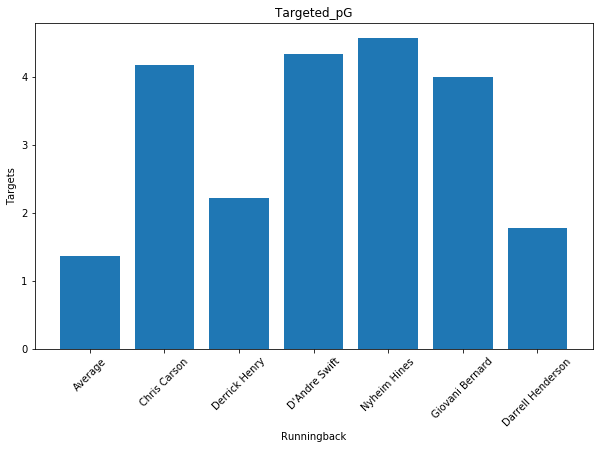

In [59]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.08
Chris Carson Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.08
Derrick Henry Receptions_pG: 1.22
--------------------------------------------------
Avg Receptions_pG: 1.08
D'Andre Swift Receptions_pG: 3.44
--------------------------------------------------
Avg Receptions_pG: 1.08
Nyheim Hines Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.08
Giovani Bernard Receptions_pG: 3.11
--------------------------------------------------
Avg Receptions_pG: 1.08
Darrell Henderson Receptions_pG: 1.22
--------------------------------------------------


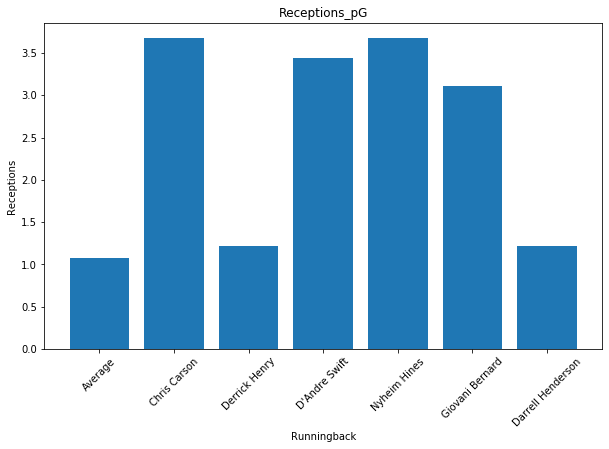

In [60]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

Week 10 opponents:
    
    Seattle Seahawks vs Arizona Cardinals
    Tennessee Titans vs Baltimore Ravens
    Detroit Lions vs Carolina Panthers
    Indianapolis Colts vs Green Bay Panthers
    Cincannit Bengals vs Washington Football Team
    Los Angeles Rams vs Tampa Bay Buccaneers

In [61]:
rb_opp = ['Arizona Cardinals', 'Baltimore Ravens', 'Carolina Panthers', 'Green Bay Packers', 
          'Washington Football Team', 'Tampa Bay Buccaneers']

In [62]:
defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,9,165,570,5.10,2907,219,987,4.51,7,326,5.89,169,11.36,1920,12,21,16,70.40,14,4,10,25,95.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,18.33,323.00,24.33,109.67,36.22,18.78,0.52,213.33,1.33,1.56,2.78,10.56
7,Arizona Cardinals,9,210,609,5.50,3330,238,1082,4.55,5,349,6.44,209,10.76,2248,17,31,16,56.00,12,8,4,22,52.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,23.33,370.00,26.44,120.22,38.78,23.22,0.60,249.78,1.89,1.33,2.44,5.78
10,Washington Football Team,9,218,553,5.00,2886,261,1134,4.34,9,264,6.64,153,11.45,1752,14,25,14,55.60,9,8,1,28,52.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,24.22,320.67,29.00,126.00,29.33,17.00,0.58,194.67,1.56,1.00,3.11,5.78
11,Green Bay Packers,9,224,523,6.00,3023,219,997,4.55,11,284,7.13,166,12.20,2026,14,28,19,69.40,7,4,3,20,42.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,24.89,335.89,24.33,110.78,31.56,18.44,0.58,225.11,1.56,0.78,2.22,4.67
12,Tampa Bay Buccaneers,10,226,618,4.90,3003,231,766,3.32,8,355,6.30,201,11.13,2237,17,32,21,71.30,17,12,5,32,80.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,22.60,300.30,23.10,76.60,35.50,20.10,0.57,223.70,1.70,1.70,3.20,8.00
30,Carolina Panthers,10,272,644,5.70,3800,262,1239,4.73,14,372,6.88,214,11.97,2561,16,41,24,59.20,13,5,8,10,32.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,2.00,-1.00,27.20,380.00,26.20,123.90,37.20,21.40,0.58,256.10,1.60,1.30,1.00,3.20


In [63]:
teamRB1 = 7
teamRB2 = 0
teamRB3 = 30
teamRB4 = 11
teamRB5 = 10
teamRB6 = 12

Avg Rushing_Att_pG: 27.17
Arizona Cardinals Rushing_Att_pG: 26.44
--------------------------------------------------
Avg Rushing_Att_pG: 27.17
Baltimore Ravens Rushing_Att_pG: 24.33
--------------------------------------------------
Avg Rushing_Att_pG: 27.17
Carolina Panthers Rushing_Att_pG: 26.2
--------------------------------------------------
Avg Rushing_Att_pG: 27.17
Green Bay Packers Rushing_Att_pG: 24.33
--------------------------------------------------
Avg Rushing_Att_pG: 27.17
Washington Football Team Rushing_Att_pG: 29.0
--------------------------------------------------
Avg Rushing_Att_pG: 27.17
Tampa Bay Buccaneers Rushing_Att_pG: 23.1
--------------------------------------------------


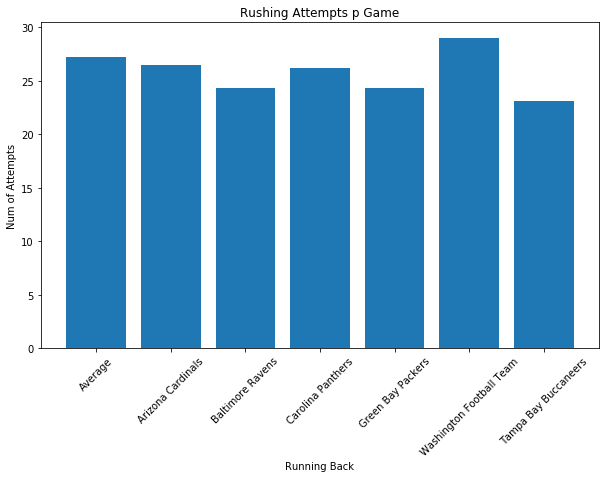

In [64]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Avg Rushing_Yds_pG: 118.24
Arizona Cardinals Rushing_Yds_pG: 120.22
--------------------------------------------------
Avg Rushing_Yds_pG: 118.24
Baltimore Ravens Rushing_Yds_pG: 109.67
--------------------------------------------------
Avg Rushing_Yds_pG: 118.24
Carolina Panthers Rushing_Yds_pG: 123.9
--------------------------------------------------
Avg Rushing_Yds_pG: 118.24
Green Bay Packers Rushing_Yds_pG: 110.78
--------------------------------------------------
Avg Rushing_Yds_pG: 118.24
Washington Football Team Rushing_Yds_pG: 126.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.24
Tampa Bay Buccaneers Rushing_Yds_pG: 76.6
--------------------------------------------------


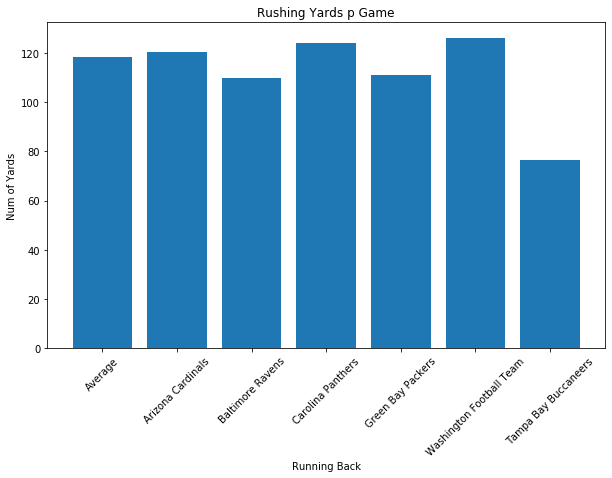

In [65]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Avg Rushing_TDs: 9.53
Arizona Cardinals Rushing_TDs: 5
--------------------------------------------------
Avg Rushing_TDs: 9.53
Baltimore Ravens Rushing_TDs: 7
--------------------------------------------------
Avg Rushing_TDs: 9.53
Carolina Panthers Rushing_TDs: 14
--------------------------------------------------
Avg Rushing_TDs: 9.53
Green Bay Packers Rushing_TDs: 11
--------------------------------------------------
Avg Rushing_TDs: 9.53
Washington Football Team Rushing_TDs: 9
--------------------------------------------------
Avg Rushing_TDs: 9.53
Tampa Bay Buccaneers Rushing_TDs: 8
--------------------------------------------------


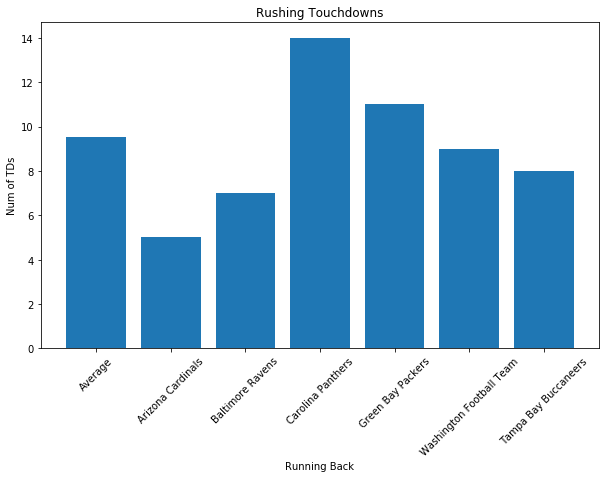

In [66]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')


## Tight End

In [67]:
tight_ends = offense[offense['Position'] == 'TE']

In [68]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [69]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
7,Travis Kelce,KAN,TE,31,9,9,0,0,0,0,0,0,0,0.00,0,80,58,769,15.60,6,1,1,6,0,0,139.90,1,8,110.90,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,8.89,6.44,85.44,0.67,0.11
31,Jonnu Smith,TEN,TE,25,9,9,0,0,0,0,0,1,1,1.00,1,43,26,318,14.30,6,0,0,7,0,0,86.90,2,32,73.90,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,7.50,4.78,2.89,35.33,0.67,0.00
39,T.J. Hockenson,DET,TE,23,9,9,0,0,0,0,0,0,0,0.00,0,53,36,373,13.60,5,0,0,5,1,0,87.30,3,40,69.30,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,1.30,5.89,4.00,41.44,0.56,0.00
42,Mark Andrews,BAL,TE,24,9,2,0,0,0,0,0,0,0,0.00,0,53,33,358,18.50,5,2,0,5,0,0,82.30,4,43,65.80,17.80,2.90,2.20,17.70,11.60,2.10,0.00,3.20,2.20,6.10,5.89,3.67,39.78,0.56,0.00
43,Darren Waller,LVR,TE,28,9,8,0,0,0,0,0,0,0,0.00,0,76,53,431,9.30,4,1,1,4,0,0,91.60,5,44,65.10,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,3.70,8.44,5.89,47.89,0.44,0.11


In [70]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
31,Jonnu Smith,TEN,TE,25,9,9,0,0,0,0,0,1,1,1.00,1,43,26,318,14.30,6,0,0,7,0,0,86.90,2,32,73.90,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,7.50,4.78,2.89,35.33,0.67,0.00
48,Rob Gronkowski,TAM,TE,31,10,10,0,0,0,0,0,0,0,0.00,0,49,29,374,21.00,4,1,0,4,0,0,75.90,7,49,61.40,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,11.10,4.90,2.90,37.40,0.40,0.00


In [71]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [72]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
31,Jonnu Smith,TEN,TE,25,9,9,1.77,1.48,1.77,3.48,-0.35
48,Rob Gronkowski,TAM,TE,31,10,10,1.85,1.49,1.95,1.72,-0.35
54,Jimmy Graham,CHI,TE,34,10,10,2.35,2.06,1.35,2.38,-0.35
154,Tyler Higbee,LAR,TE,27,8,8,1.20,1.46,1.91,1.55,-0.35
159,Eric Ebron,PIT,TE,27,9,7,2.19,2.01,1.82,1.28,2.20


In [73]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
313,C.J. Uzomah,CIN,TE,27,2,2,2.22,2.54,2.45,2.38,-0.35,9.94
31,Jonnu Smith,TEN,TE,25,9,9,1.77,1.48,1.77,3.48,-0.35,8.85
54,Jimmy Graham,CHI,TE,34,10,10,2.35,2.06,1.35,2.38,-0.35,8.48
240,O.J. Howard,TAM,TE,26,4,1,1.75,1.35,1.87,2.38,-0.35,7.69
48,Rob Gronkowski,TAM,TE,31,10,10,1.85,1.49,1.95,1.72,-0.35,7.35
162,Logan Thomas,WAS,TE,29,9,8,2.40,1.69,1.63,1.28,-0.35,7.34
243,Jordan Reed,SFO,TE,30,5,0,1.78,1.96,1.33,1.72,-0.35,7.14
250,Dallas Goedert,PHI,TE,25,5,3,1.91,2.16,1.93,0.40,-0.35,6.74
154,Tyler Higbee,LAR,TE,27,8,8,1.20,1.46,1.91,1.55,-0.35,6.48
160,Dalton Schultz,DAL,TE,24,9,7,2.61,2.43,2.37,0.54,2.20,5.76


In [76]:
te1 = 31
te2 = 48
te3 = 162
te4 = 154

Avg Targeted_pG: 1.96
Jonnu Smith Targeted_pG: 4.78
--------------------------------------------------
Avg Targeted_pG: 1.96
Rob Gronkowski Targeted_pG: 4.9
--------------------------------------------------
Avg Targeted_pG: 1.96
Logan Thomas Targeted_pG: 5.78
--------------------------------------------------
Avg Targeted_pG: 1.96
Tyler Higbee Targeted_pG: 3.88
--------------------------------------------------


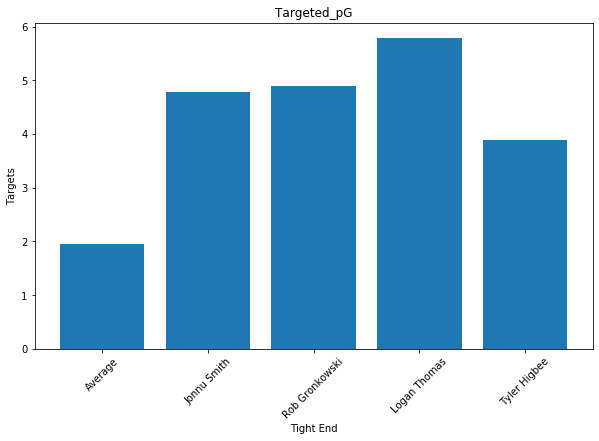

In [77]:
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.34
Jonnu Smith Receptions_pG: 2.89
--------------------------------------------------
Avg Receptions_pG: 1.34
Rob Gronkowski Receptions_pG: 2.9
--------------------------------------------------
Avg Receptions_pG: 1.34
Logan Thomas Receptions_pG: 3.11
--------------------------------------------------
Avg Receptions_pG: 1.34
Tyler Higbee Receptions_pG: 2.88
--------------------------------------------------


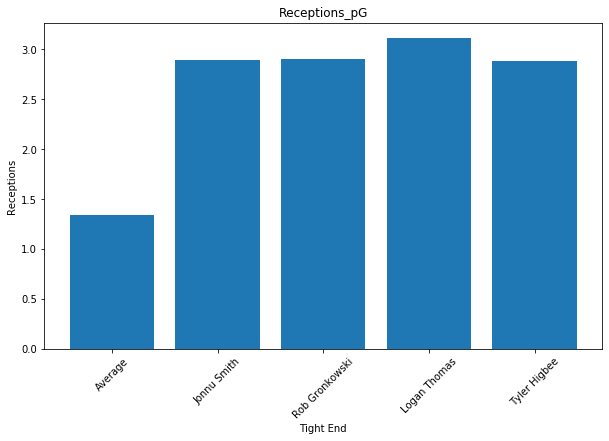

In [78]:
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

Avg ReceivingYds_pG: 13.97
Jonnu Smith ReceivingYds_pG: 35.33
--------------------------------------------------
Avg ReceivingYds_pG: 13.97
Rob Gronkowski ReceivingYds_pG: 37.4
--------------------------------------------------
Avg ReceivingYds_pG: 13.97
Logan Thomas ReceivingYds_pG: 33.56
--------------------------------------------------
Avg ReceivingYds_pG: 13.97
Tyler Higbee ReceivingYds_pG: 37.0
--------------------------------------------------


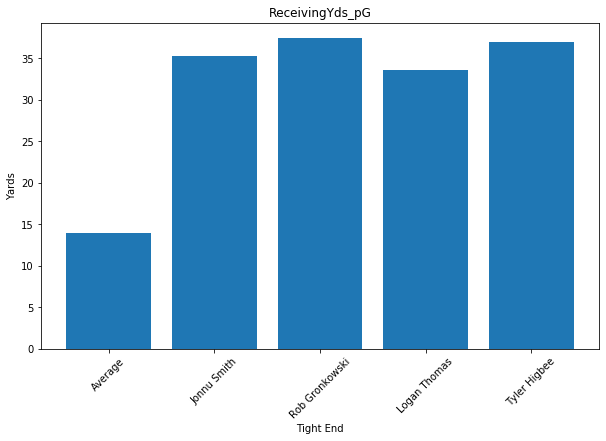

In [79]:
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

Avg ReceivingTDs_pG: 0.14
Jonnu Smith ReceivingTDs_pG: 0.67
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Rob Gronkowski ReceivingTDs_pG: 0.4
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Logan Thomas ReceivingTDs_pG: 0.33
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Tyler Higbee ReceivingTDs_pG: 0.38
--------------------------------------------------


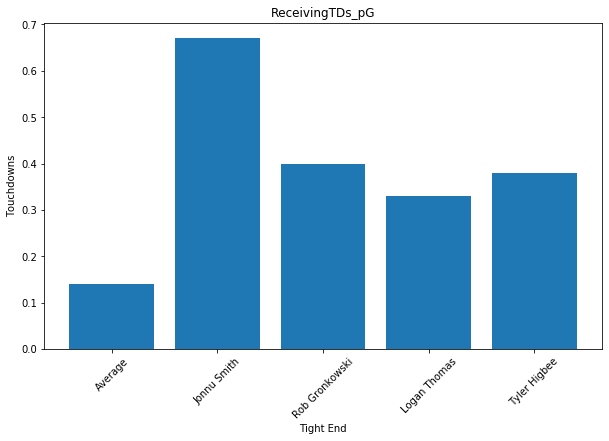

In [80]:
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

In [81]:
te_opp = ['Baltimore Ravens', 'Los Angeles Rams', 'Cincinnati Bengals', 'Tampa Bay Buccaneers']

In [82]:
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,9,165,570,5.10,2907,219,987,4.51,7,326,5.89,169,11.36,1920,12,21,16,70.40,14,4,10,25,95.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,18.33,323.00,24.33,109.67,36.22,18.78,0.52,213.33,1.33,1.56,2.78,10.56
1,Los Angeles Rams,9,168,558,4.70,2668,214,871,4.07,7,313,5.74,193,9.31,1797,9,26,15,61.10,13,8,5,31,71.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,18.67,296.44,23.78,96.78,34.78,21.44,0.62,199.67,1.00,1.44,3.44,7.89
12,Tampa Bay Buccaneers,10,226,618,4.90,3003,231,766,3.32,8,355,6.30,201,11.13,2237,17,32,21,71.30,17,12,5,32,80.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,22.60,300.30,23.10,76.60,35.50,20.10,0.57,223.70,1.70,1.70,3.20,8.00
20,Cincinnati Bengals,9,250,577,6.30,3584,240,1198,4.99,7,326,7.32,192,12.43,2386,21,34,25,73.10,9,8,1,11,18.00,3.00,-2.00,7.00,5.00,3.00,4.00,-2.00,4.00,0.00,-4.00,27.78,398.22,26.67,133.11,36.22,21.33,0.59,265.11,2.33,1.00,1.22,2.00


In [83]:
teamTE1 = 0
teamTE2 = 1
teamTE3 = 20
teamTE4 = 12

Avg Passing_Att_pG: 35.41
Baltimore Ravens Passing_Att_pG: 36.22
--------------------------------------------------
Avg Passing_Att_pG: 35.41
Los Angeles Rams Passing_Att_pG: 34.78
--------------------------------------------------
Avg Passing_Att_pG: 35.41
Cincinnati Bengals Passing_Att_pG: 36.22
--------------------------------------------------
Avg Passing_Att_pG: 35.41
Tampa Bay Buccaneers Passing_Att_pG: 35.5
--------------------------------------------------


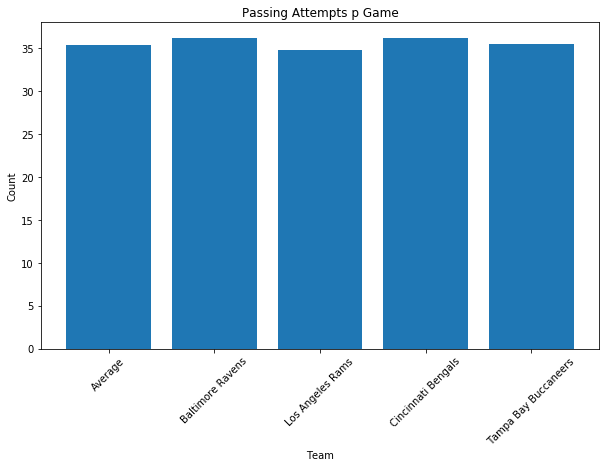

In [84]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Avg Completions_pG: 19.79
Baltimore Ravens Completions_pG: 18.78
--------------------------------------------------
Avg Completions_pG: 19.79
Los Angeles Rams Completions_pG: 21.44
--------------------------------------------------
Avg Completions_pG: 19.79
Cincinnati Bengals Completions_pG: 21.33
--------------------------------------------------
Avg Completions_pG: 19.79
Tampa Bay Buccaneers Completions_pG: 20.1
--------------------------------------------------


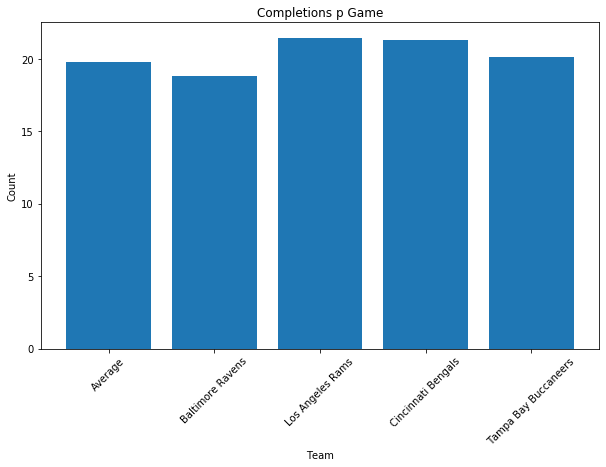

In [85]:
average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Avg Passing_Yds_pG: 245.68
Minnesota Vikings Passing_Yds_pG: 287.88
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Indianapolis Colts Passing_Yds_pG: 206.38
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Detroit Lions Passing_Yds_pG: 243.88
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Carolina Panthers Passing_Yds_pG: 247.44
--------------------------------------------------


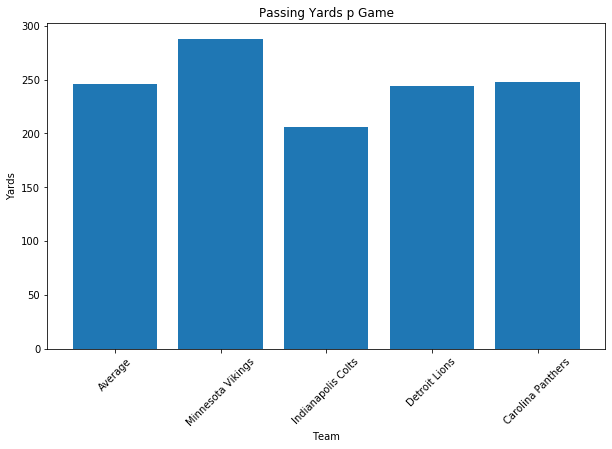

In [120]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.78
Minnesota Vikings Passing_TDs_pG: 2.38
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Indianapolis Colts Passing_TDs_pG: 1.25
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Detroit Lions Passing_TDs_pG: 2.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Carolina Panthers Passing_TDs_pG: 1.44
--------------------------------------------------


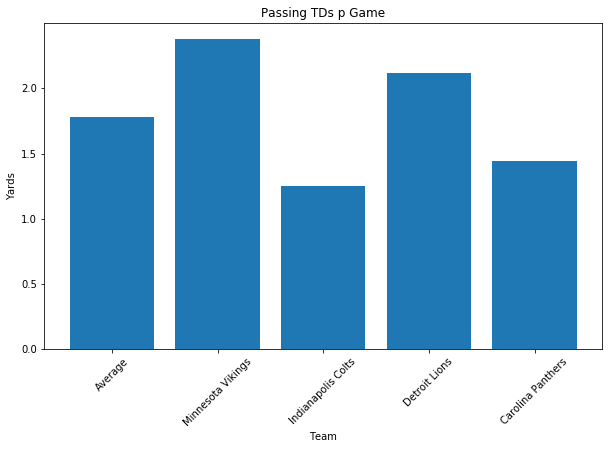

In [121]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')

I don't even know what to do this week. The Carolina Panthers are not giving up in terms of passing yards and touchdowns. The Colts are also not giving muchb in terms of touchdowns so Smith is facing an uphill battle. Maybe I go with Graham? Maybe Thomas? I'm still not sure.

## Wide Receiver

In [122]:
wrs = offense[offense['Position'] == 'WR']

In [123]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [124]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,8,8,0,0,0,0,0,0,0,0.00,0,76,60,734,14.30,3,1,1,3,0,0,119.40,9,25,89.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,9.50,7.50,0.79,91.75,0.38,0.12
38,Julio Jones,ATL,WR,31,7,7,0,0,0,0,0,0,0,0.00,0,56,43,638,22.40,3,0,0,3,0,0,103.30,18,39,81.80,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,8.00,6.14,0.77,91.14,0.43,0.00
42,Robby Anderson,CAR,WR,27,9,9,0,0,0,0,0,1,3,3.00,0,80,60,751,17.20,1,1,1,1,1,0,111.40,20,43,81.50,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,8.89,6.67,0.75,83.44,0.11,0.11
43,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,21,44,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,8.50,6.75,0.79,73.00,0.38,0.00
103,Cole Beasley,BUF,WR,31,9,5,0,0,0,0,0,0,0,0.00,0,54,44,533,13.10,2,0,0,2,0,0,87.30,33,,65.30,5.80,7.00,10.00,9.20,5.30,10.50,11.20,2.40,3.90,6.00,4.89,0.81,59.22,0.22,0.00


In [125]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,8,8,0,0,0,0,0,0,0,0.00,0,76,60,734,14.30,3,1,1,3,0,0,119.40,9,25,89.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,9.50,7.50,0.79,91.75,0.38,0.12
38,Julio Jones,ATL,WR,31,7,7,0,0,0,0,0,0,0,0.00,0,56,43,638,22.40,3,0,0,3,0,0,103.30,18,39,81.80,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,8.00,6.14,0.77,91.14,0.43,0.00
42,Robby Anderson,CAR,WR,27,9,9,0,0,0,0,0,1,3,3.00,0,80,60,751,17.20,1,1,1,1,1,0,111.40,20,43,81.50,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,8.89,6.67,0.75,83.44,0.11,0.11
43,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,21,44,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,8.50,6.75,0.79,73.00,0.38,0.00
51,CeeDee Lamb,DAL,WR,21,9,7,0,0,0,0,0,5,33,12.00,0,68,44,595,18.20,3,2,1,3,0,0,100.80,23,52,78.80,5.90,11.50,6.60,20.20,12.40,6.40,0.10,4.60,11.10,7.56,4.89,0.65,66.11,0.33,0.11


In [126]:
available_wrs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'Week_8', 'Week_9', 'Targeted_pG', 'Receptions_pG',
       'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG'],
      dtype='object')

In [127]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,8,8,2.67,3.37,0.66,3.06,1.34,1.09
38,Julio Jones,ATL,WR,7,7,2.03,2.52,0.54,3.03,1.65,-0.23
42,Robby Anderson,CAR,WR,9,9,2.41,2.84,0.44,2.67,-0.16,0.94
43,Tyler Boyd,CIN,WR,8,5,2.24,2.90,0.68,2.18,1.34,-0.23
51,CeeDee Lamb,DAL,WR,9,7,1.84,1.73,-0.11,1.85,1.11,0.94


In [128]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
114,Jamison Crowder,NYJ,WR,5,4,2.71,2.55,-0.12,2.59,2.63,-0.23,10.59
24,DeAndre Hopkins,ARI,WR,8,8,2.67,3.37,0.66,3.06,1.34,1.09,10.01
38,Julio Jones,ATL,WR,7,7,2.03,2.52,0.54,3.03,1.65,-0.23,10.00
43,Tyler Boyd,CIN,WR,8,5,2.24,2.90,0.68,2.18,1.34,-0.23,9.57
180,Allen Lazard,GNB,WR,3,3,1.03,1.38,0.52,2.73,3.01,-0.23,8.90
136,Emmanuel Sanders,NOR,WR,6,2,1.53,1.80,0.34,1.42,2.06,-0.23,7.39
125,Corey Davis,TEN,WR,6,6,1.60,1.70,0.12,1.64,2.06,-0.23,7.34
42,Robby Anderson,CAR,WR,9,9,2.41,2.84,0.44,2.67,-0.16,0.94,7.26
56,Christian Kirk,ARI,WR,7,6,1.05,0.73,-0.51,1.43,4.09,-0.23,7.03
70,Brandin Cooks,HOU,WR,8,8,1.81,1.57,-0.28,1.74,1.34,-0.23,6.42


In [129]:
wr1 = 24
wr2 = 43
wr3 = 180
wr4 = 136
wr5 = 125
wr6 = 42
wr7 = 56
wr8 = 70

Avg Targeted_pG: 3.26
DeAndre Hopkins Targeted_pG: 9.5
--------------------------------------------------
Avg Targeted_pG: 3.26
Tyler Boyd Targeted_pG: 8.5
--------------------------------------------------
Avg Targeted_pG: 3.26
Allen Lazard Targeted_pG: 5.67
--------------------------------------------------
Avg Targeted_pG: 3.26
Emmanuel Sanders Targeted_pG: 6.83
--------------------------------------------------
Avg Targeted_pG: 3.26
Corey Davis Targeted_pG: 7.0
--------------------------------------------------
Avg Targeted_pG: 3.26
Robby Anderson Targeted_pG: 8.89
--------------------------------------------------
Avg Targeted_pG: 3.26
Christian Kirk Targeted_pG: 5.71
--------------------------------------------------
Avg Targeted_pG: 3.26
Brandin Cooks Targeted_pG: 7.5
--------------------------------------------------


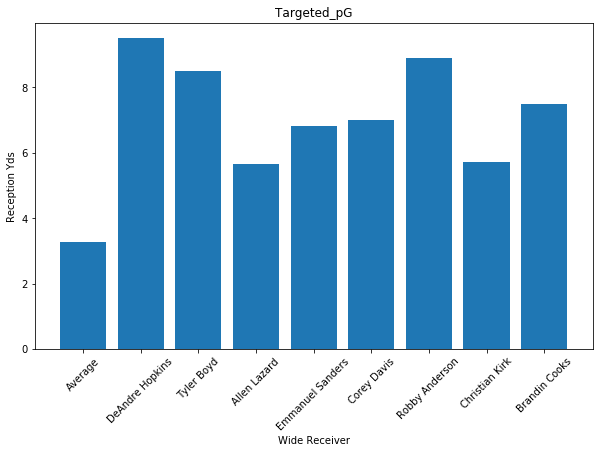

In [130]:
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.13
DeAndre Hopkins Receptions_pG: 7.5
--------------------------------------------------
Avg Receptions_pG: 2.13
Tyler Boyd Receptions_pG: 6.75
--------------------------------------------------
Avg Receptions_pG: 2.13
Allen Lazard Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 2.13
Emmanuel Sanders Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.13
Corey Davis Receptions_pG: 4.83
--------------------------------------------------
Avg Receptions_pG: 2.13
Robby Anderson Receptions_pG: 6.67
--------------------------------------------------
Avg Receptions_pG: 2.13
Christian Kirk Receptions_pG: 3.29
--------------------------------------------------
Avg Receptions_pG: 2.13
Brandin Cooks Receptions_pG: 4.62
--------------------------------------------------


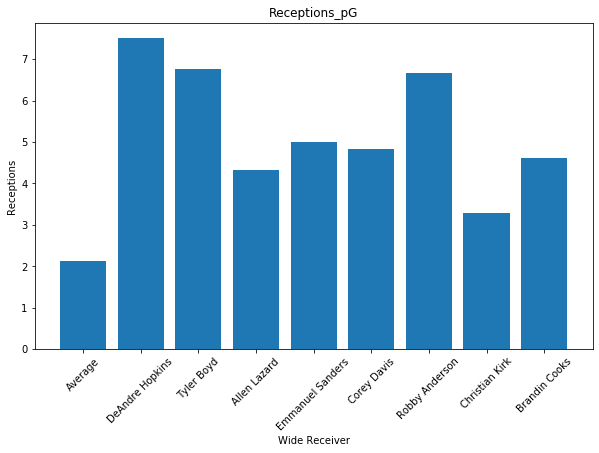

In [131]:
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

Avg Catch_Rate: 0.67
DeAndre Hopkins Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Tyler Boyd Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Allen Lazard Catch_Rate: 0.76
--------------------------------------------------
Avg Catch_Rate: 0.67
Emmanuel Sanders Catch_Rate: 0.73
--------------------------------------------------
Avg Catch_Rate: 0.67
Corey Davis Catch_Rate: 0.69
--------------------------------------------------
Avg Catch_Rate: 0.67
Robby Anderson Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.67
Christian Kirk Catch_Rate: 0.57
--------------------------------------------------
Avg Catch_Rate: 0.67
Brandin Cooks Catch_Rate: 0.62
--------------------------------------------------


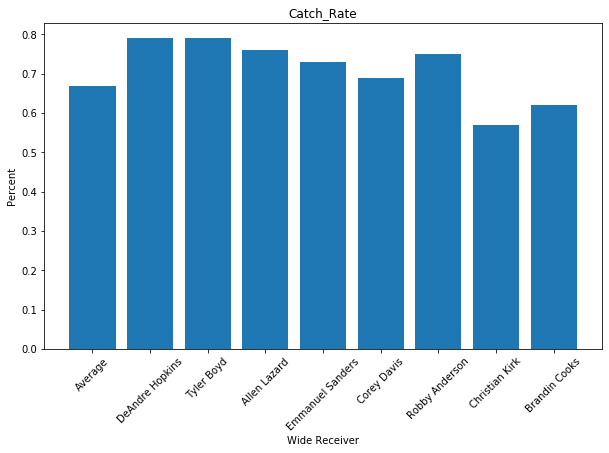

In [132]:
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

Avg ReceivingYds_pG: 26.75
DeAndre Hopkins ReceivingYds_pG: 91.75
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Tyler Boyd ReceivingYds_pG: 73.0
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Allen Lazard ReceivingYds_pG: 84.67
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Emmanuel Sanders ReceivingYds_pG: 57.0
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Corey Davis ReceivingYds_pG: 61.5
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Robby Anderson ReceivingYds_pG: 83.44
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Christian Kirk ReceivingYds_pG: 57.14
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Brandin Cooks ReceivingYds_pG: 63.75
--------------------------------------------------


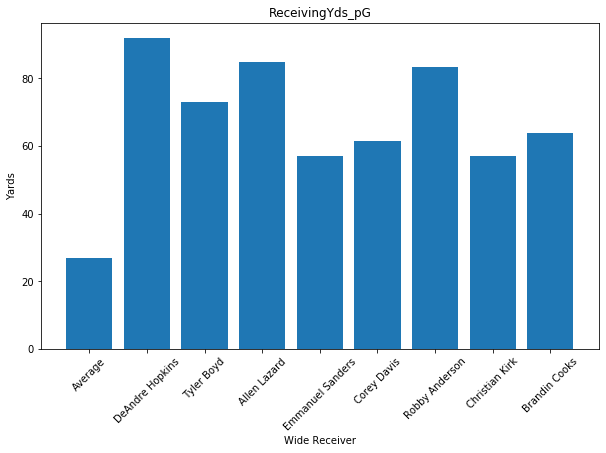

In [133]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

Avg ReceivingTDs_pG: 0.14
DeAndre Hopkins ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Tyler Boyd ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Allen Lazard ReceivingTDs_pG: 0.67
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Emmanuel Sanders ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Corey Davis ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Robby Anderson ReceivingTDs_pG: 0.11
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Christian Kirk ReceivingTDs_pG: 0.86
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Brandin Cooks ReceivingTDs_pG: 0.38
--------------------------------------------------


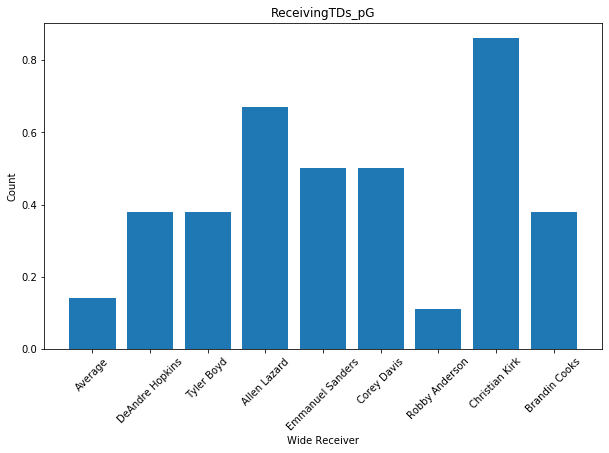

In [134]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

In [135]:
wr_opp = ['Buffalo Bills', 'Pittsburgh Steelers', 'Jacksonville Jaguars', 'San Francisco 49ers', 'Indianapolis Colts', 
          'Tampa Bay Buccaneers', 'Buffalo Bills', 'Cleveland Browns']

In [136]:
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,13,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,20.00,290.00,25.25,83.62,32.38,15.62,0.48,206.38,1.25,1.62,2.50,11.00
4,Pittsburgh Steelers,8,161,500,5.10,2539,200,822,4.11,5,268,6.41,122,14.07,1717,14,22,13,64.80,15,11,4,32,81.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,20.12,317.38,25.00,102.75,33.50,15.25,0.46,214.62,1.75,1.88,4.00,10.12
12,Tampa Bay Buccaneers,9,203,571,4.90,2816,215,701,3.26,7,327,6.47,179,11.82,2115,15,30,19,68.10,16,11,5,29,75.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,22.56,312.89,23.89,77.89,36.33,19.89,0.55,235.00,1.67,1.78,3.22,8.33
15,San Francisco 49ers,9,207,547,5.30,2922,241,956,3.97,5,291,6.76,151,13.02,1966,16,22,13,44.40,10,8,2,15,43.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,0.00,23.00,324.67,26.78,106.22,32.33,16.78,0.52,218.44,1.78,1.11,1.67,4.78
22,Buffalo Bills,9,233,570,5.80,3283,245,1132,4.62,13,301,7.15,165,13.04,2151,14,36,23,59.60,14,6,8,24,50.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,25.89,364.78,27.22,125.78,33.44,18.33,0.55,239.00,1.56,1.56,2.67,5.56
24,Cleveland Browns,8,237,545,5.50,2971,215,853,3.97,9,310,6.83,194,10.92,2118,17,35,21,60.20,14,7,7,20,47.00,0.00,4.00,14.00,5.00,13.00,1.00,7.00,3.00,0.00,29.62,371.38,26.88,106.62,38.75,24.25,0.63,264.75,2.12,1.75,2.50,5.88
28,Jacksonville Jaguars,8,247,523,6.40,3345,247,1105,4.47,11,268,8.36,170,13.18,2240,17,33,19,56.00,7,6,1,8,26.00,6.00,0.00,0.00,2.00,4.00,1.00,9.00,0.00,4.00,30.88,418.12,30.88,138.12,33.50,21.25,0.63,280.00,2.12,0.88,1.00,3.25


In [137]:
teamWR1 = 22
teamWR2 = 4
teamWR3 = 28
teamWR4 = 15
teamWR5 = 2
teamWR6 = 12
teamWR7 = 22
teamWR8 = 24

Avg Ttl_Pts_Allowed_pG: 25.34
Buffalo Bills Ttl_Pts_Allowed_pG: 25.89
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Pittsburgh Steelers Ttl_Pts_Allowed_pG: 20.12
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Jacksonville Jaguars Ttl_Pts_Allowed_pG: 30.88
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
San Francisco 49ers Ttl_Pts_Allowed_pG: 23.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Indianapolis Colts Ttl_Pts_Allowed_pG: 20.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Tampa Bay Buccaneers Ttl_Pts_Allowed_pG: 22.56
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Buffalo Bills Ttl_Pts_Allowed_pG: 25.89
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Cleveland Browns Ttl_Pts_Allowed_pG: 29.62
--------------------------------------------------


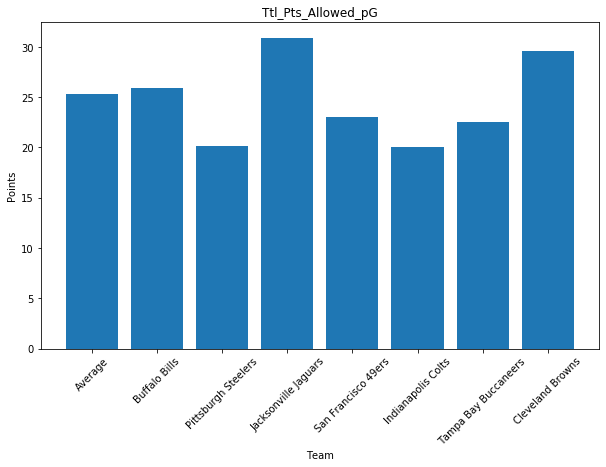

In [138]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Passing_TDs_pG: 1.78
Buffalo Bills Passing_TDs_pG: 1.56
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Pittsburgh Steelers Passing_TDs_pG: 1.75
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Jacksonville Jaguars Passing_TDs_pG: 2.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
San Francisco 49ers Passing_TDs_pG: 1.78
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Indianapolis Colts Passing_TDs_pG: 1.25
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Tampa Bay Buccaneers Passing_TDs_pG: 1.67
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Buffalo Bills Passing_TDs_pG: 1.56
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Cleveland Browns Passing_TDs_pG: 2.12
--------------------------------------------------


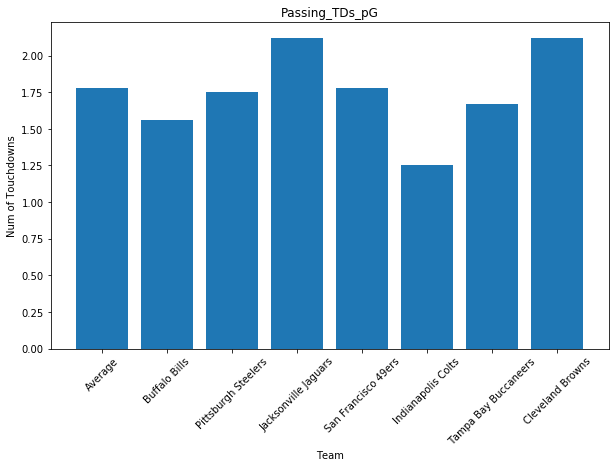

In [139]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Passing_Att_pG: 35.35
Buffalo Bills Passing_Att_pG: 33.44
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Pittsburgh Steelers Passing_Att_pG: 33.5
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Jacksonville Jaguars Passing_Att_pG: 33.5
--------------------------------------------------
Avg Passing_Att_pG: 35.35
San Francisco 49ers Passing_Att_pG: 32.33
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Indianapolis Colts Passing_Att_pG: 32.38
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Tampa Bay Buccaneers Passing_Att_pG: 36.33
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Buffalo Bills Passing_Att_pG: 33.44
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Cleveland Browns Passing_Att_pG: 38.75
--------------------------------------------------


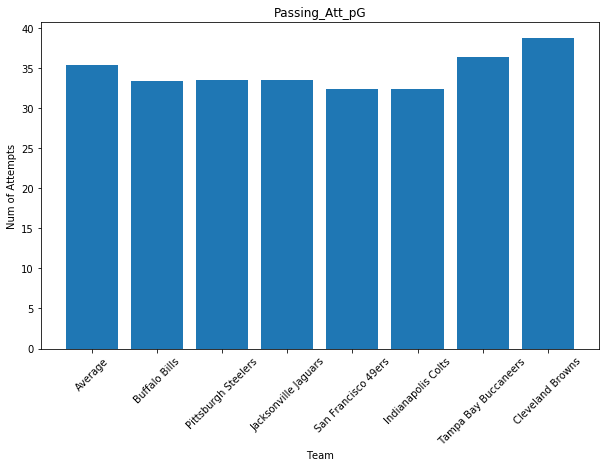

In [140]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Avg Completions_pG: 19.26
Buffalo Bills Completions_pG: 18.33
--------------------------------------------------
Avg Completions_pG: 19.26
Pittsburgh Steelers Completions_pG: 15.25
--------------------------------------------------
Avg Completions_pG: 19.26
Jacksonville Jaguars Completions_pG: 21.25
--------------------------------------------------
Avg Completions_pG: 19.26
San Francisco 49ers Completions_pG: 16.78
--------------------------------------------------
Avg Completions_pG: 19.26
Indianapolis Colts Completions_pG: 15.62
--------------------------------------------------
Avg Completions_pG: 19.26
Tampa Bay Buccaneers Completions_pG: 19.89
--------------------------------------------------
Avg Completions_pG: 19.26
Buffalo Bills Completions_pG: 18.33
--------------------------------------------------
Avg Completions_pG: 19.26
Cleveland Browns Completions_pG: 24.25
--------------------------------------------------


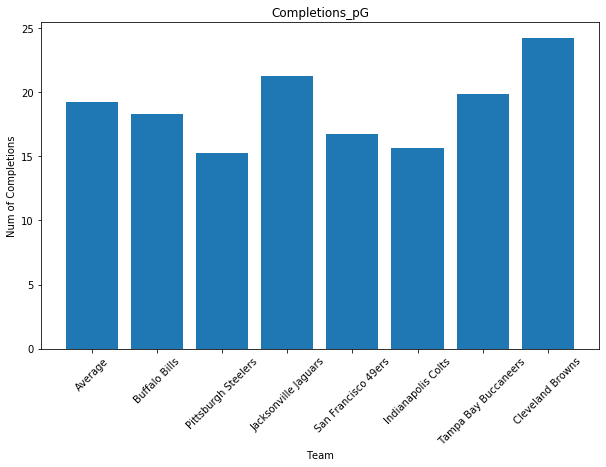

In [141]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Avg Completion_Percent_Allowed: 0.54
Buffalo Bills Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Pittsburgh Steelers Completion_Percent_Allowed: 0.46
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Jacksonville Jaguars Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
San Francisco 49ers Completion_Percent_Allowed: 0.52
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Indianapolis Colts Completion_Percent_Allowed: 0.48
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Tampa Bay Buccaneers Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Buffalo Bills Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_A

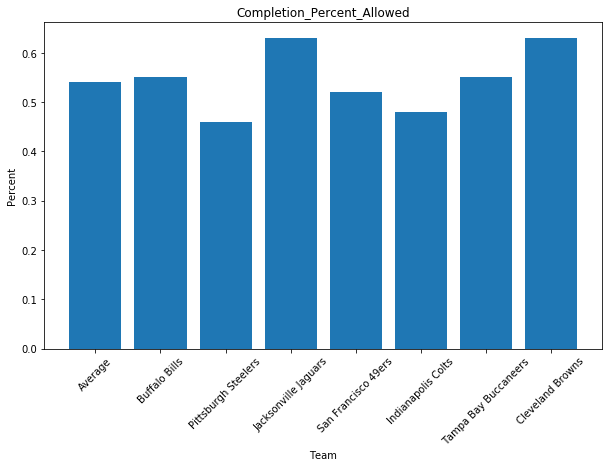

In [142]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Avg Passing_Yds_pG: 245.68
Buffalo Bills Passing_Yds_pG: 239.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Pittsburgh Steelers Passing_Yds_pG: 214.62
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Jacksonville Jaguars Passing_Yds_pG: 280.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
San Francisco 49ers Passing_Yds_pG: 218.44
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Indianapolis Colts Passing_Yds_pG: 206.38
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Tampa Bay Buccaneers Passing_Yds_pG: 235.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Buffalo Bills Passing_Yds_pG: 239.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Cleveland Browns Passing_Yds_pG: 264.75
--------------------------------------------------


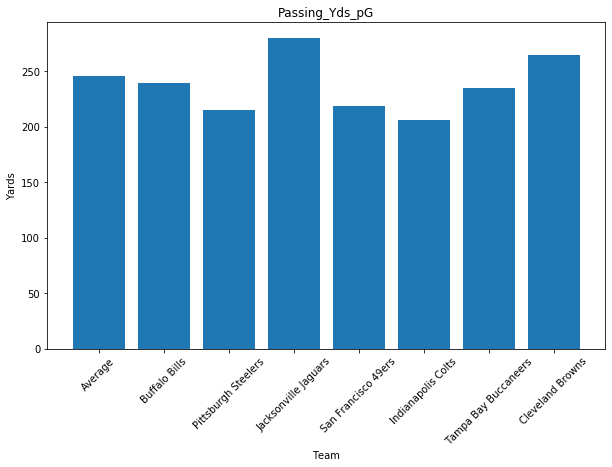

In [143]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')




## Defense

In [144]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [145]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,59,267,1,23,19,153,0,1,0,1,57.50
ARI,190,279,2130,16,7,253,1303,13,262,190,2130,16,10,3,29,748.50
ATL,236,352,2746,15,5,259,959,11,342,236,2746,15,6,2,26,809.30
BAL,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70
BUF,220,320,2609,19,5,229,903,9,310,220,2609,19,7,6,28,792.60


In [146]:
ttl_offense.reset_index(inplace=True)

In [147]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [148]:
ttl_offense.columns

Index(['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds',
       'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'ReceivingTDs',
       'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts', 'Long_Name'],
      dtype='object')

In [149]:
num_games = defense[['Team', 'GP']]
num_games

,Team,GP
0,Baltimore Ravens,8
1,Los Angeles Rams,8
2,Indianapolis Colts,8
3,Miami Dolphins,8
4,Pittsburgh Steelers,8
5,Arizona Cardinals,8
6,Kansas City Chiefs,9
7,Washington Football Team,8
8,Chicago Bears,9
9,New England Patriots,8


In [150]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,8,190,279,2130,16,7,253,1303,13,262,190,2130,16,10,3,29,748.50,10
1,ATL,Atlanta Falcons,9,236,352,2746,15,5,259,959,11,342,236,2746,15,6,2,26,809.30,7
2,BAL,Baltimore Ravens,8,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70,10
3,BUF,Buffalo Bills,9,220,320,2609,19,5,229,903,9,310,220,2609,19,7,6,28,792.60,11
4,CAR,Carolina Panthers,9,221,310,2419,11,6,222,958,11,295,222,2447,11,5,3,22,716.20,9
5,CHI,Chicago Bears,9,238,371,2306,16,10,199,730,2,358,237,2302,16,8,2,18,673.90,12
6,CIN,Cincinnati Bengals,8,222,331,2288,11,5,217,810,9,321,222,2288,11,11,5,20,661.30,10
7,CLE,Cleveland Browns,8,145,236,1634,16,7,237,1202,8,221,145,1634,16,5,2,24,620.40,9
8,DAL,Dallas Cowboys,9,248,389,2781,12,8,243,987,9,379,248,2781,12,17,12,21,762.00,20
9,DEN,Denver Broncos,8,170,295,1967,11,12,205,893,7,281,170,1967,11,12,4,18,585.70,16


In [151]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [152]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'New Orleans Saints', 'New York Giants', 'Pittsburgh Steelers', 'San Francisco 49ers', 
             'Tampa Bay Buccaneers']

In [153]:
taken_off = ['New England Patriots', 'Arizona Cardinals', 'Tennessee Titans', 'Seattle Seahawks', 
             'San Francisco 49ers', 'Philadelphia Eagles', 'Cincinnati Bengals', 
             'New Orleans Saints', 'Carolina Panthers']

In [154]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [155]:
available_def

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
3,Miami Dolphins,8,161,531,5.80,3074,215,1054,4.90,10,296,6.82,146,13.84,2020,11,25,17,65.80,14,7,7,20,77.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,20.12,384.25,26.88,131.75,37.00,18.25,0.49,252.50,1.38,1.75,2.50,9.62
5,Arizona Cardinals,8,180,541,5.50,2961,220,1009,4.59,5,299,6.53,173,11.28,1952,14,30,15,50.50,10,6,4,22,49.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,22.50,370.12,27.50,126.12,37.38,21.62,0.58,244.00,1.75,1.25,2.75,6.12
7,Washington Football Team,8,188,498,5.00,2514,240,1029,4.29,9,231,6.43,127,11.69,1485,11,23,13,56.20,9,8,1,27,52.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,23.50,314.25,30.00,128.62,28.88,15.88,0.55,185.62,1.38,1.12,3.38,6.50
8,Chicago Bears,9,190,588,5.10,3016,254,1053,4.15,6,314,6.25,161,12.19,1963,10,31,13,46.00,9,5,4,20,52.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,21.11,335.11,28.22,117.00,34.89,17.89,0.51,218.11,1.11,1.00,2.22,5.78
9,New England Patriots,8,194,456,6.10,2823,234,1048,4.48,8,211,8.41,117,15.17,1775,12,25,15,57.80,14,10,4,11,53.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,3.00,24.25,352.88,29.25,131.00,26.38,14.62,0.55,221.88,1.50,1.75,1.38,6.62
11,Tennessee Titans,8,201,549,5.70,3153,212,953,4.50,7,327,6.73,170,12.94,2200,19,29,23,81.80,14,9,5,10,40.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,14.00,25.12,394.12,26.50,119.12,40.88,21.25,0.52,275.00,2.38,1.75,1.25,5.00
13,Green Bay Packers,8,204,462,6.00,2763,196,888,4.53,11,249,7.53,146,12.84,1875,13,26,18,71.90,6,3,3,17,36.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,25.50,345.38,24.50,111.00,31.12,18.25,0.59,234.38,1.62,0.75,2.12,4.50
14,Philadelphia Eagles,8,205,545,5.00,2721,239,1046,4.38,11,278,6.03,166,10.09,1675,13,26,18,67.40,10,3,7,28,58.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,25.62,340.12,29.88,130.75,34.75,20.75,0.60,209.38,1.62,1.25,3.50,7.25
16,Cincinnati Bengals,8,214,511,6.30,3207,220,1154,5.25,7,280,7.33,162,12.67,2053,17,29,21,72.20,9,8,1,11,22.00,3.00,-2.00,7.00,5.00,3.00,4.00,-2.00,4.00,0.00,26.75,400.88,27.50,144.25,35.00,20.25,0.58,256.62,2.12,1.12,1.38,2.75
17,Los Angeles Chargers,8,216,504,5.70,2868,192,946,4.93,7,296,6.49,160,12.01,1922,16,25,14,56.00,7,4,3,16,34.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,2.00,27.00,358.50,24.00,118.25,37.00,20.00,0.54,240.25,2.00,0.88,2.00,4.25


In [156]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG
3,Miami Dolphins,8,-2.11,0.10,-0.40,0.38,-0.75,-1.46,-0.08,-1.38,0.73,1.59
5,Arizona Cardinals,8,-1.37,-0.33,-0.14,0.03,0.47,0.58,-0.31,-0.44,1.08,0.22
7,Washington Football Team,8,-1.07,-2.04,0.88,0.19,-1.60,-0.11,-1.90,-1.38,1.95,-0.12
8,Chicago Bears,9,-1.80,-1.40,0.16,-0.53,-0.07,-1.00,-1.02,-1.69,0.34,-0.46
9,New England Patriots,8,-0.83,-0.86,0.58,0.33,-2.05,0.00,-0.91,-1.07,-0.84,1.59


In [157]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
7,Washington Football Team,8,-1.07,-2.04,0.88,0.19,-1.60,-0.11,-1.90,-1.38,1.95,-0.12,8.86
3,Miami Dolphins,8,-2.11,0.10,-0.40,0.38,-0.75,-1.46,-0.08,-1.38,0.73,1.59,8.01
8,Chicago Bears,9,-1.80,-1.40,0.16,-0.53,-0.07,-1.00,-1.02,-1.69,0.34,-0.46,7.23
9,New England Patriots,8,-0.83,-0.86,0.58,0.33,-2.05,0.00,-0.91,-1.07,-0.84,1.59,5.56
13,Green Bay Packers,8,-0.45,-1.09,-1.37,-0.89,-0.75,0.76,-0.57,-0.75,0.20,-1.14,4.17


In [158]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
1,ATL,Atlanta Falcons,9,236,352,2746,15,5,259,959,11,342,236,2746,15,6,2,26,809.30,7,26.22,39.11,0.67,305.11,7.80,28.78,106.56,3.70,411.67,0.78,2.89
2,BAL,Baltimore Ravens,8,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70,10,16.88,26.88,0.63,190.25,7.08,33.12,170.12,5.14,360.38,1.25,2.88
3,BUF,Buffalo Bills,9,220,320,2609,19,5,229,903,9,310,220,2609,19,7,6,28,792.60,11,24.44,35.56,0.69,289.89,8.15,25.44,100.33,3.94,390.22,1.22,3.11
5,CHI,Chicago Bears,9,238,371,2306,16,10,199,730,2,358,237,2302,16,8,2,18,673.90,12,26.44,41.22,0.64,256.22,6.22,22.11,81.11,3.67,337.33,1.33,2.00
7,CLE,Cleveland Browns,8,145,236,1634,16,7,237,1202,8,221,145,1634,16,5,2,24,620.40,9,18.12,29.50,0.61,204.25,6.92,29.62,150.25,5.07,354.50,1.12,3.00


In [163]:
def_team1 = 7 # Washington Football Team
def_team2 = 3 # Miami Dolphins
def_team3 = 8 # Chicago Bears
def_team4 = 9 # New England Patriots
def_team5 = 13 # Green Bay Packers

In [159]:
off_opp = ['DET', 'LAC', 'MIN', 'BAL', 'JAX']

In [160]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
2,BAL,Baltimore Ravens,8,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70,10,16.88,26.88,0.63,190.25,7.08,33.12,170.12,5.14,360.38,1.25,2.88
10,DET,Detroit Lions,8,182,291,2221,15,8,199,809,7,276,180,2213,15,3,1,22,667.10,9,22.75,36.38,0.63,277.62,7.63,24.88,101.12,4.07,378.75,1.12,2.75
14,JAX,Jacksonville Jaguars,8,202,305,2159,14,6,177,791,7,290,202,2159,14,8,5,21,652.60,11,25.25,38.12,0.66,269.88,7.08,22.12,98.88,4.47,368.75,1.38,2.62
16,LAC,Los Angeles Chargers,8,198,301,2358,17,5,247,1016,5,286,196,2343,17,8,5,22,713.20,10,24.75,37.62,0.66,294.75,7.83,30.88,127.00,4.11,421.75,1.25,2.75
20,MIN,Minnesota Vikings,8,137,209,1855,15,10,235,1283,13,201,137,1855,15,4,2,28,688.50,12,17.12,26.12,0.66,231.88,8.88,29.38,160.38,5.46,392.25,1.50,3.50


In [161]:
off_team1 = 10
off_team2 = 16
off_team3 = 20
off_team4 = 2
off_team5 = 14

Avg Ttl_Yds_pG: 380.86
Washington Football Team Ttl_Yds_pG: 314.25
--------------------------------------------------
Avg Ttl_Yds_pG: 380.86
Miami Dolphins Ttl_Yds_pG: 384.25
--------------------------------------------------
Avg Ttl_Yds_pG: 380.86
Chicago Bears Ttl_Yds_pG: 335.11
--------------------------------------------------
Avg Ttl_Yds_pG: 380.86
New England Patriots Ttl_Yds_pG: 352.88
--------------------------------------------------
Avg Ttl_Yds_pG: 380.86
Green Bay Packers Ttl_Yds_pG: 345.38
--------------------------------------------------


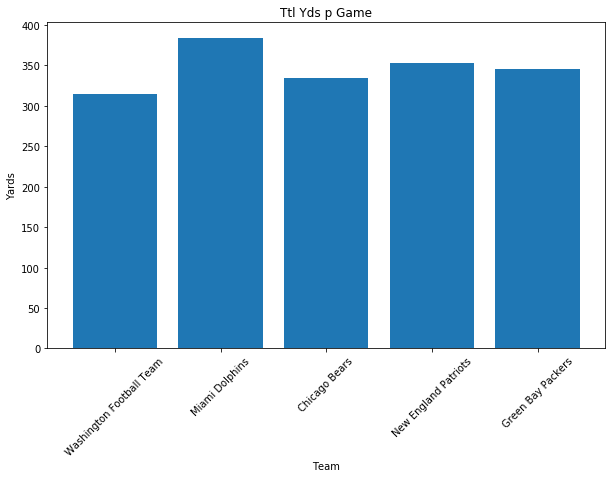

In [164]:
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

Avg Ttl_Turnovers_pG: 1.17
Washington Football Team Ttl_Turnovers_pG: 1.12
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.17
Miami Dolphins Ttl_Turnovers_pG: 1.75
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.17
Chicago Bears Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.17
New England Patriots Ttl_Turnovers_pG: 1.75
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.17
Green Bay Packers Ttl_Turnovers_pG: 0.75
--------------------------------------------------


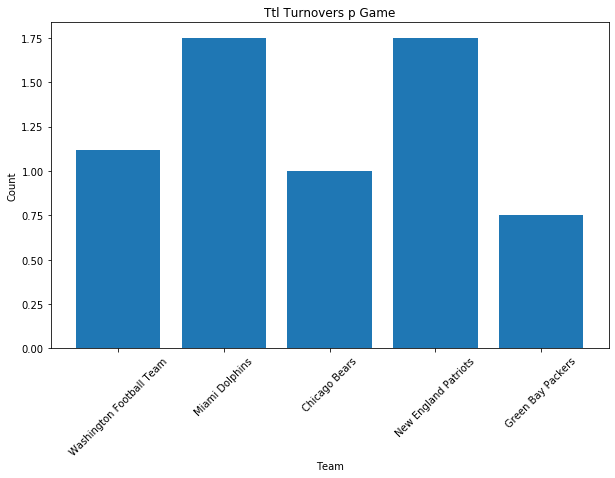

In [165]:
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

Avg Sacks_pG: 1.98
Washington Football Team Sacks_pG: 3.38
--------------------------------------------------
Avg Sacks_pG: 1.98
Miami Dolphins Sacks_pG: 2.5
--------------------------------------------------
Avg Sacks_pG: 1.98
Chicago Bears Sacks_pG: 2.22
--------------------------------------------------
Avg Sacks_pG: 1.98
New England Patriots Sacks_pG: 1.38
--------------------------------------------------
Avg Sacks_pG: 1.98
Green Bay Packers Sacks_pG: 2.12
--------------------------------------------------


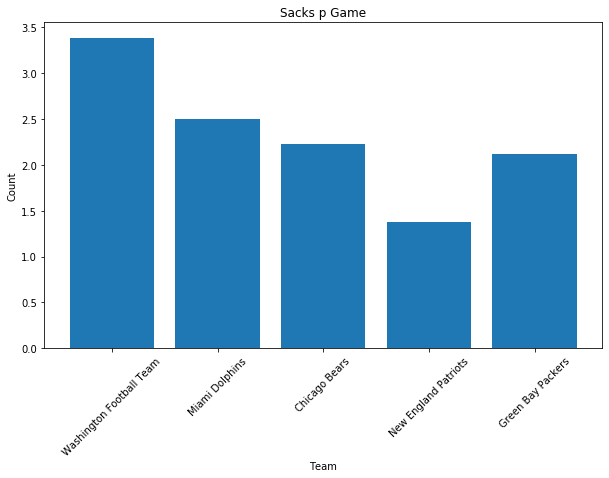

In [166]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")

In [167]:
available_off.columns

Index(['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted',
       'PassingYds', 'PassingTDs', 'Interceptions', 'RushingAttempts',
       'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts',
       'Ttl_Turnovers', 'CompletedPasses_pG', 'PassesAttempted_pG',
       'Completion_Percent', 'PassingYds_pG', 'PassYds_pAtt',
       'RushingAttempts_pG', 'RushingYds_pG', 'RushYds_pAtt', 'Ttl_Yds',
       'Ttl_Turnovers_pG', 'TtlTDs_pG'],
      dtype='object')

Avg Ttl_Yds: 370.0
DET Ttl_Yds: 378.75
--------------------------------------------------
Avg Ttl_Yds: 370.0
LAC Ttl_Yds: 421.75
--------------------------------------------------
Avg Ttl_Yds: 370.0
MIN Ttl_Yds: 392.25
--------------------------------------------------
Avg Ttl_Yds: 370.0
BAL Ttl_Yds: 360.38
--------------------------------------------------
Avg Ttl_Yds: 370.0
JAX Ttl_Yds: 368.75
--------------------------------------------------


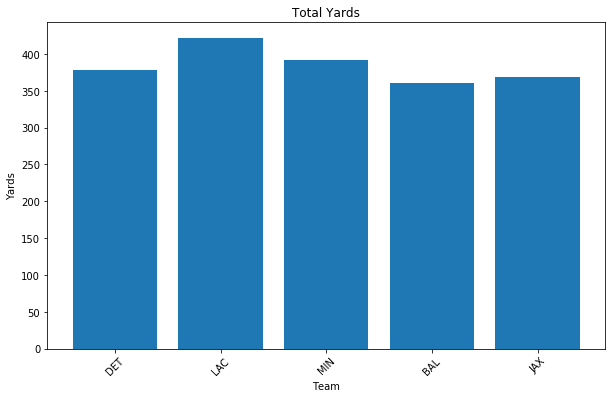

In [168]:
average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Avg Ttl_Turnovers_pG: 1.26
DET Ttl_Turnovers_pG: 1.12
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.26
LAC Ttl_Turnovers_pG: 1.25
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.26
MIN Ttl_Turnovers_pG: 1.5
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.26
BAL Ttl_Turnovers_pG: 1.25
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.26
JAX Ttl_Turnovers_pG: 1.38
--------------------------------------------------


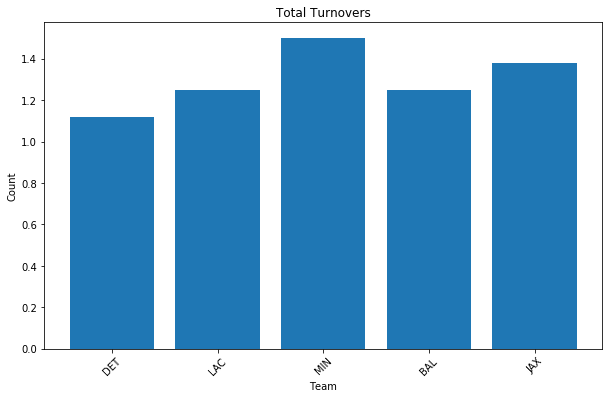

In [170]:
average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Avg TtlTDs_pG: 2.72
DET TtlTDs_pG: 2.75
--------------------------------------------------
Avg TtlTDs_pG: 2.72
LAC TtlTDs_pG: 2.75
--------------------------------------------------
Avg TtlTDs_pG: 2.72
MIN TtlTDs_pG: 3.5
--------------------------------------------------
Avg TtlTDs_pG: 2.72
BAL TtlTDs_pG: 2.88
--------------------------------------------------
Avg TtlTDs_pG: 2.72
JAX TtlTDs_pG: 2.62
--------------------------------------------------


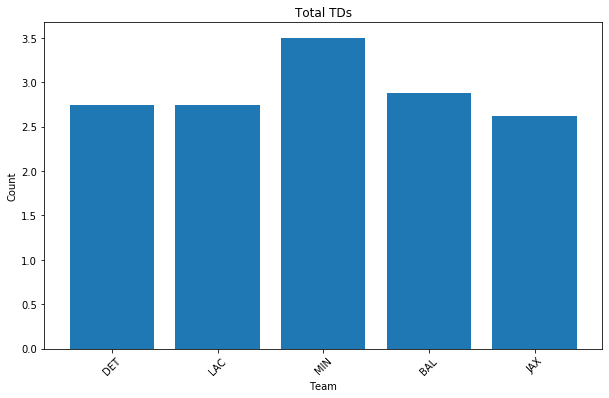

In [171]:
average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

The Packers are going up against Jacksonville's backup quarterback. I think that's an easy win for the Packers.

## Kicking

In [172]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
0,Younghoe Koo,K,ATL,8,22,95.50,54,0-0,5-5,6-6,7-8,3-3,21,85.70,81,94.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00
3,Tyler Bass,K,BUF,9,22,72.70,53,1-1,4-4,4-7,6-7,1-3,27,96.30,74,82.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00
4,Randy Bullock,K,CIN,8,20,90.00,55,0-0,3-3,7-8,6-7,2-2,20,100.00,74,84.00,10.00,13.00,12.00,17.00,3.00,12.00,10.00,7.00,0.00
5,Daniel Carlson,K,LV,8,19,89.50,54,0-0,7-7,5-5,2-4,3-3,24,95.80,74,82.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,7.00
6,Ryan Succop,K,TB,9,18,88.90,50,0-0,3-3,7-7,5-6,1-2,27,96.30,74,81.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00,4.00


In [173]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [174]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [175]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
13,Brandon McManus,K,DEN,8,17,94.10,56,0-0,3-3,1-1,7-7,5-6,17,94.10,64,81.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,11.00,0,3,1,7,5
22,Stephen Gostkowski,K,TEN,8,18,61.10,55,0-0,1-2,3-4,2-6,5-6,25,92.00,56,68.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,7.00,0,1,3,2,5
11,Graham Gano,K,NYG,9,20,95.00,55,0-0,4-4,7-7,4-4,4-5,13,100.00,70,82.00,4.00,7.00,13.00,9.00,20.00,8.00,3.00,5.00,13.00,0,4,7,4,4
8,Jason Sanders,K,MIA,8,17,100.00,56,0-0,5-5,2-2,6-6,4-4,21,100.00,72,86.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,0,5,2,6,4
0,Younghoe Koo,K,ATL,8,22,95.50,54,0-0,5-5,6-6,7-8,3-3,21,85.70,81,94.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00,0,5,6,7,3


In [176]:
available_kickers.columns

Index(['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', '_1_19',
       '_20_29', '_30_39', '_40_49', 'OVER50', 'XPM_A', 'XP%', 'PTS', 'TTL',
       'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7',
       'Week_8', 'Week_9', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49',
       'FG_OVER50'],
      dtype='object')

In [177]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
0,Younghoe Koo,K,ATL,8,1.52,0.70,0.50,0.50,-0.21,1.41,-0.26,1.68,1.28,1.68,1.02
3,Tyler Bass,K,BUF,9,1.52,-0.12,0.44,1.10,0.32,1.14,3.87,1.11,0.38,1.26,-0.37
4,Randy Bullock,K,CIN,8,1.23,0.50,0.56,0.40,0.50,1.14,-0.26,0.54,1.73,1.26,0.33
5,Daniel Carlson,K,LV,8,1.08,0.48,0.50,0.80,0.29,1.14,-0.26,2.82,0.83,-0.42,1.02
6,Ryan Succop,K,TB,9,0.93,0.46,0.26,1.10,0.32,1.14,-0.26,0.54,1.73,0.84,-0.37


In [181]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head(10)

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
3,Tyler Bass,K,BUF,9,1.52,-0.12,0.44,1.10,0.32,1.14,3.87,1.11,0.38,1.26,-0.37,10.65
0,Younghoe Koo,K,ATL,8,1.52,0.70,0.50,0.50,-0.21,1.41,-0.26,1.68,1.28,1.68,1.02,9.82
11,Graham Gano,K,NYG,9,1.23,0.68,0.56,-0.30,0.50,0.99,-0.26,1.11,1.73,0.42,1.72,8.37
5,Daniel Carlson,K,LV,8,1.08,0.48,0.50,0.80,0.29,1.14,-0.26,2.82,0.83,-0.42,1.02,8.29
8,Jason Sanders,K,MIA,8,0.79,0.86,0.61,0.50,0.50,1.07,-0.26,1.68,-0.52,1.26,1.72,8.20
4,Randy Bullock,K,CIN,8,1.23,0.50,0.56,0.40,0.50,1.14,-0.26,0.54,1.73,1.26,0.33,7.92
16,Mason Crosby,K,GB,8,-0.09,0.86,0.44,1.30,0.33,0.64,3.87,-1.18,0.38,0.42,0.33,7.29
6,Ryan Succop,K,TB,9,0.93,0.46,0.26,1.10,0.32,1.14,-0.26,0.54,1.73,0.84,-0.37,6.69
13,Brandon McManus,K,DEN,8,0.79,0.65,0.61,0.10,0.21,0.75,-0.26,0.54,-0.97,1.68,2.42,6.51
15,Cairo Santos,K,CHI,9,0.79,0.44,0.56,0.10,0.50,0.68,-0.26,1.11,1.28,0.00,0.33,5.51


In [182]:
kicker1 = 3
kicker2 = 11
kicker3 = 5
kicker4 = 8
kicker5 = 4

Avg FGM_A: 11.62
Tyler Bass FGM_A: 22
--------------------------------------------------
Avg FGM_A: 11.62
Graham Gano FGM_A: 20
--------------------------------------------------
Avg FGM_A: 11.62
Daniel Carlson FGM_A: 19
--------------------------------------------------
Avg FGM_A: 11.62
Jason Sanders FGM_A: 17
--------------------------------------------------
Avg FGM_A: 11.62
Randy Bullock FGM_A: 20
--------------------------------------------------


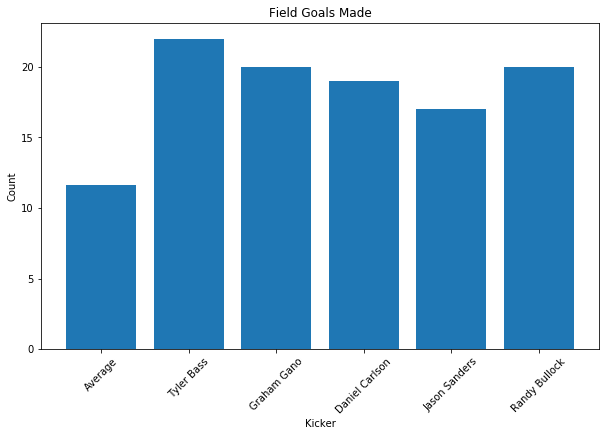

In [183]:
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

Avg FG%: 75.93
Tyler Bass FG%: 72.7
--------------------------------------------------
Avg FG%: 75.93
Graham Gano FG%: 95.0
--------------------------------------------------
Avg FG%: 75.93
Daniel Carlson FG%: 89.5
--------------------------------------------------
Avg FG%: 75.93
Jason Sanders FG%: 100.0
--------------------------------------------------
Avg FG%: 75.93
Randy Bullock FG%: 90.0
--------------------------------------------------


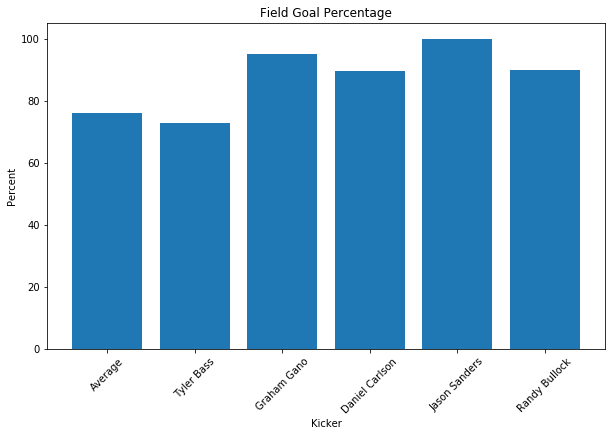

In [184]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XPM_A: 15.97
Tyler Bass XPM_A: 27
--------------------------------------------------
Avg XPM_A: 15.97
Graham Gano XPM_A: 13
--------------------------------------------------
Avg XPM_A: 15.97
Daniel Carlson XPM_A: 24
--------------------------------------------------
Avg XPM_A: 15.97
Jason Sanders XPM_A: 21
--------------------------------------------------
Avg XPM_A: 15.97
Randy Bullock XPM_A: 20
--------------------------------------------------


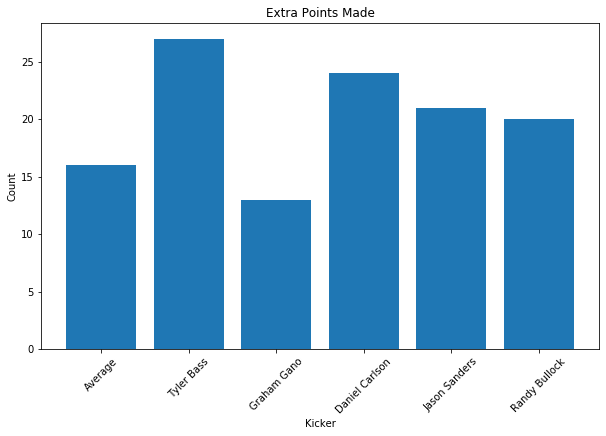

In [185]:
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

Avg XP%: 89.93
Tyler Bass XP%: 96.3
--------------------------------------------------
Avg XP%: 89.93
Graham Gano XP%: 100.0
--------------------------------------------------
Avg XP%: 89.93
Daniel Carlson XP%: 95.8
--------------------------------------------------
Avg XP%: 89.93
Jason Sanders XP%: 100.0
--------------------------------------------------
Avg XP%: 89.93
Randy Bullock XP%: 100.0
--------------------------------------------------


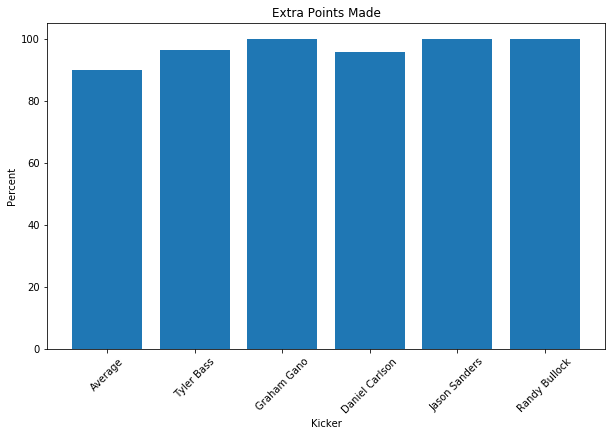

In [186]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

In [187]:
kicking_opponents = ['Arizona Cardinals', 'Philadelphia Eagles', 'Denver Broncos', 'Los Angeles Chargers', 
                     'Pittsburgh Steelers']

In [188]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
4,Pittsburgh Steelers,8,161,500,5.10,2539,200,822,4.11,5,268,6.41,122,14.07,1717,14,22,13,64.80,15,11,4,32,81.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,20.12,317.38,25.00,102.75,33.50,15.25,0.46,214.62,1.75,1.88,4.00,10.12,19,28,9.33
5,Arizona Cardinals,8,180,541,5.50,2961,220,1009,4.59,5,299,6.53,173,11.28,1952,14,30,15,50.50,10,6,4,22,49.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,22.50,370.12,27.50,126.12,37.38,21.62,0.58,244.00,1.75,1.25,2.75,6.12,19,47,15.67
14,Philadelphia Eagles,8,205,545,5.00,2721,239,1046,4.38,11,278,6.03,166,10.09,1675,13,26,18,67.40,10,3,7,28,58.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,25.62,340.12,29.88,130.75,34.75,20.75,0.60,209.38,1.62,1.25,3.50,7.25,24,37,12.33
17,Los Angeles Chargers,8,216,504,5.70,2868,192,946,4.93,7,296,6.49,160,12.01,1922,16,25,14,56.00,7,4,3,16,34.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,2.00,27.00,358.50,24.00,118.25,37.00,20.00,0.54,240.25,2.00,0.88,2.00,4.25,23,55,18.33
18,Denver Broncos,8,217,541,5.30,2883,222,956,4.31,6,297,6.49,157,12.27,1927,14,29,14,46.90,9,6,3,22,38.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,3.00,27.12,360.38,27.75,119.50,37.12,19.62,0.53,240.88,1.75,1.12,2.75,4.75,20,77,25.67


In [189]:
kick_def1 = 5
kick_def2 = 14
kick_def3 = 18
kick_def4 = 17
kick_def5 = 4

Avg RZ_Percent: 57.12
Arizona Cardinals RZ_Percent: 50.5
--------------------------------------------------
Avg RZ_Percent: 57.12
Philadelphia Eagles RZ_Percent: 67.4
--------------------------------------------------
Avg RZ_Percent: 57.12
Denver Broncos RZ_Percent: 46.9
--------------------------------------------------
Avg RZ_Percent: 57.12
Los Angeles Chargers RZ_Percent: 56.0
--------------------------------------------------
Avg RZ_Percent: 57.12
Pittsburgh Steelers RZ_Percent: 64.8
--------------------------------------------------


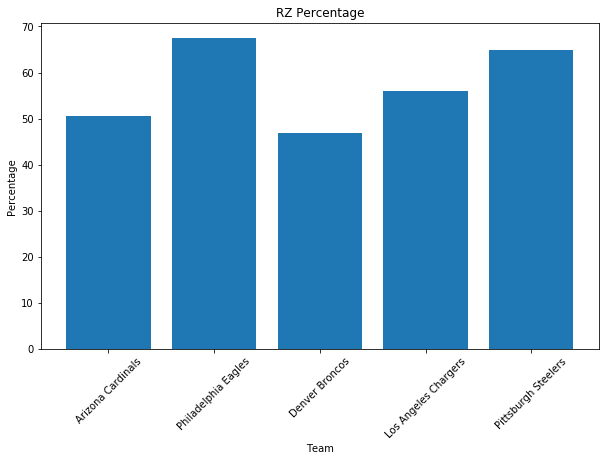

In [190]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')

Avg Num_Field_Goals_Allowed: 16.27
Arizona Cardinals Num_Field_Goals_Allowed: 15.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 16.27
Philadelphia Eagles Num_Field_Goals_Allowed: 12.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 16.27
Denver Broncos Num_Field_Goals_Allowed: 25.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 16.27
Los Angeles Chargers Num_Field_Goals_Allowed: 18.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 16.27
Pittsburgh Steelers Num_Field_Goals_Allowed: 9.33
--------------------------------------------------


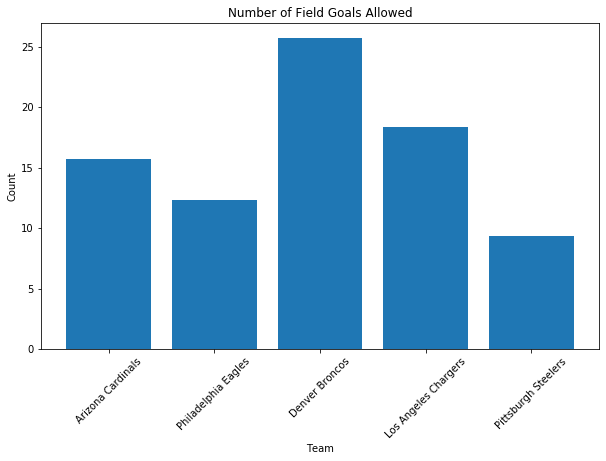

In [191]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Avg Ttl_TDs: 21.0
Arizona Cardinals Ttl_TDs: 19
--------------------------------------------------
Avg Ttl_TDs: 21.0
Philadelphia Eagles Ttl_TDs: 24
--------------------------------------------------
Avg Ttl_TDs: 21.0
Denver Broncos Ttl_TDs: 20
--------------------------------------------------
Avg Ttl_TDs: 21.0
Los Angeles Chargers Ttl_TDs: 23
--------------------------------------------------
Avg Ttl_TDs: 21.0
Pittsburgh Steelers Ttl_TDs: 19
--------------------------------------------------


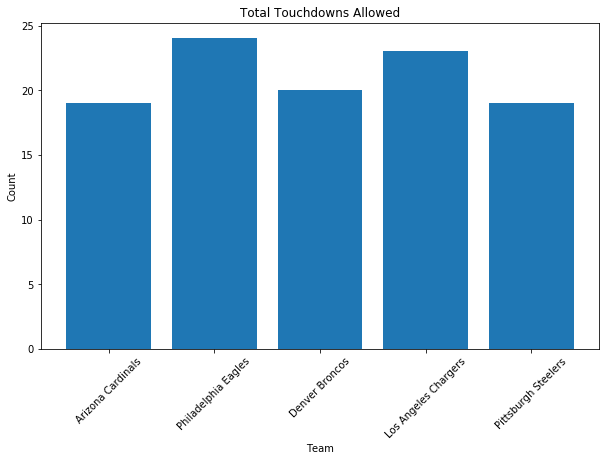

In [192]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

Teams are kicking way more field goals against the Broncos so I want to go with Daniel Carlson.